# 1. Giới thiệu Project 
**Coronavirus** là một họ vi-rút có thể gây bệnh, có thể khiến *cảm lạnh thông thường* và *ho* trở bệnh nặng hơn. **Hội chứng hô hấp Trung Đông (MERS-CoV)** và **Hội chứng hô hấp cấp tính nặng (SARS-CoV)** là những trường hợp nghiêm trọng mà thế giới phải đối mặt.<br> **SARS-CoV-2 (n-coronavirus)** SARS-CoV-2 (n-coronavirus) là loại virus mới thuộc họ coronavirus, *được phát hiện* lần đầu vào năm 2019, chưa được xác định ở người trước đây.

Nó là một loại vi-rút *truyền nhiễm* bắt đầu từ **Vũ Hán** vào **tháng 12 năm 2019**. Sau này, nó được **WHO** tuyên bố là **đại dịch** do tốc độ lây lan cao trên toàn thế giới. Hiện tại (ngày 10 tháng 6 năm 2020), đại dịch này đã khiến hơn *500 nghìn* người chết trên toàn cầu.<br>

Đại dịch đang lan rộng trên toàn thế giới; điều quan trọng bây giờ là hiểu rõ hơn về sự lây lan này. Notebook này đã nỗ lực phân tích dữ liệu tích lũy của các trường hợp đã xác nhận, trường hợp tử vong và hồi phục theo thời gian.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# 2. Download và Cài đặt Prerequisite
**pycountry_convert**: Sử dụng dữ liệu quốc gia lấy từ wikipedia, thư viện này cung cấp các hàm chuyển đổi giữa tên quốc gia ISO, mã quốc gia và tên lục địa.

**folium, seaborn, plotly**: Một số thư viện trực quan hóa trong Python.

Bỏ chú thích và cài đặt một số thư viện nếu bạn chưa cài đặt chúng. Nếu không, hãy tiếp tục.

In [1]:
#!pip install pycountry_convert 
#!pip install folium
#!pip install seaborn
#!pip install plotly

In [2]:
#Import thư viện
import pandas as pd
import numpy as np
from numpy import inf
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
from pycountry_convert import country_mappings as cm
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
from sklearn import linear_model
plt.style.use('fivethirtyeight')

# 3. Download tập dữ liệu

Tập dữ liệu này được cập nhật hàng ngày bởi Johns Hopkins CSSE. Tuy nhiên trong Asm này, học viên chỉ cần xử lý từ ngày đầu đến ngày 8/4/2021.

In [3]:
# Dữ liệu toàn cầu

confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
# Nhận code bạn tại đây để confirmed_df chỉ chưa dữ liệu đến ngày 8/4/2021
confirmed_df = confirmed_df.loc[:, "Province/State" : "4/8/21"]

confirmed_df

Province/State        Country/Region        Lat        Long  1/22/20  \
0              NaN           Afghanistan  33.939110   67.709953        0   
1              NaN               Albania  41.153300   20.168300        0   
2              NaN               Algeria  28.033900    1.659600        0   
3              NaN               Andorra  42.506300    1.521800        0   
4              NaN                Angola -11.202700   17.873900        0   
..             ...                   ...        ...         ...      ...   
284            NaN    West Bank and Gaza  31.952200   35.233200        0   
285            NaN  Winter Olympics 2022  39.904200  116.407400        0   
286            NaN                 Yemen  15.552727   48.516388        0   
287            NaN                Zambia -13.133897   27.849332        0   
288            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/30/21  3/31/21  \
0          0        0        0        0        0  ...    56384    56454   
1          0        0        0        0        0  ...   124723   125157   
2          0        0        0        0        0  ...   117061   117192   
3          0        0        0        0        0  ...    11944    12010   
4          0        0        0        0        0  ...    22182    22311   
..       ...      ...      ...      ...      ...  ...      ...      ...   
284        0        0        0        0        0  ...   240065   242353   
285        0        0        0        0        0  ...        0        0   
286        0        0        0        0        0  ...     4247     4357   
287        0        0        0        0        0  ...    88199    88418   
288        0        0        0        0        0  ...    36839    36882   

     4/1/21  4/2/21  4/3/21  4/4/21  4/5/21  4/6/21  4/7/21  4/8/21  
0     56517   56572   56595   56676   56717   56779   56873   56943  
1    125506  125842  126183  126531  126795  126936  127192  127509  
2    117304  117429  117524  117622  117739  117879  118004  118116  
3     12053   12115   12174   12231   12286   12328   12363   12409  
4     22399   22467   22579   22631   22717   22885   23010   23108  
..      ...     ...     ...     ...     ...     ...     ...     ...  
284  244645  246893  248482  251288  253922  256461  259133  262017  
285       0       0       0       0       0       0       0       0  
286    4531    4620    4697    4798    4881    4975    5047    5133  
287   88549   88730   88800   88930   89009   89071   89386   89592  
288   36896   36903   36911   36923   36934   36966   36984   37052  

[289 rows x 447 columns]

In [5]:
# Nhận code bạn tại đây để deaths_df chỉ chưa dữ liệu đến ngày 8/4/2021
deaths_df = deaths_df.loc[:, "Province/State" : "4/8/21"]

deaths_df

Province/State        Country/Region        Lat        Long  1/22/20  \
0              NaN           Afghanistan  33.939110   67.709953        0   
1              NaN               Albania  41.153300   20.168300        0   
2              NaN               Algeria  28.033900    1.659600        0   
3              NaN               Andorra  42.506300    1.521800        0   
4              NaN                Angola -11.202700   17.873900        0   
..             ...                   ...        ...         ...      ...   
284            NaN    West Bank and Gaza  31.952200   35.233200        0   
285            NaN  Winter Olympics 2022  39.904200  116.407400        0   
286            NaN                 Yemen  15.552727   48.516388        0   
287            NaN                Zambia -13.133897   27.849332        0   
288            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/30/21  3/31/21  \
0          0        0        0        0        0  ...     2476     2484   
1          0        0        0        0        0  ...     2227     2235   
2          0        0        0        0        0  ...     3089     3093   
3          0        0        0        0        0  ...      115      115   
4          0        0        0        0        0  ...      536      537   
..       ...      ...      ...      ...      ...  ...      ...      ...   
284        0        0        0        0        0  ...     2614     2627   
285        0        0        0        0        0  ...        0        0   
286        0        0        0        0        0  ...      882      888   
287        0        0        0        0        0  ...     1202     1208   
288        0        0        0        0        0  ...     1520     1523   

     4/1/21  4/2/21  4/3/21  4/4/21  4/5/21  4/6/21  4/7/21  4/8/21  
0      2489    2495    2496    2497    2508    2512    2512    2516  
1      2241    2247    2256    2265    2274    2283    2291    2297  
2      3096    3099    3102    3105    3108    3112    3116    3119  
3       115     116     117     117     117     117     119     120  
4       538     538     540     542     543     547     547     549  
..      ...     ...     ...     ...     ...     ...     ...     ...  
284    2645    2661    2681    2706    2716    2735    2753    2781  
285       0       0       0       0       0       0       0       0  
286     906     916     932     946     955     976     986    1004  
287    1212    1215    1215    1220    1222    1224    1224    1225  
288    1523    1524    1524    1525    1525    1531    1531    1532  

[289 rows x 447 columns]

In [6]:
# Nhận code bạn tại đây để recoveries_df chỉ chưa dữ liệu đến ngày 8/4/2021
recoveries_df = recoveries_df.loc[:, "Province/State" : "4/8/21"]

recoveries_df

Province/State        Country/Region        Lat        Long  1/22/20  \
0              NaN           Afghanistan  33.939110   67.709953        0   
1              NaN               Albania  41.153300   20.168300        0   
2              NaN               Algeria  28.033900    1.659600        0   
3              NaN               Andorra  42.506300    1.521800        0   
4              NaN                Angola -11.202700   17.873900        0   
..             ...                   ...        ...         ...      ...   
269            NaN    West Bank and Gaza  31.952200   35.233200        0   
270            NaN  Winter Olympics 2022  39.904200  116.407400        0   
271            NaN                 Yemen  15.552727   48.516388        0   
272            NaN                Zambia -13.133897   27.849332        0   
273            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/30/21  3/31/21  \
0          0        0        0        0        0  ...    51473    51550   
1          0        0        0        0        0  ...    90617    91271   
2          0        0        0        0        0  ...    81442    81538   
3          0        0        0        0        0  ...    11276    11315   
4          0        0        0        0        0  ...    20446    20493   
..       ...      ...      ...      ...      ...  ...      ...      ...   
269        0        0        0        0        0  ...   213590   215429   
270        0        0        0        0        0  ...        0        0   
271        0        0        0        0        0  ...     1667     1676   
272        0        0        0        0        0  ...    84519    84592   
273        0        0        0        0        0  ...    34617    34686   

     4/1/21  4/2/21  4/3/21  4/4/21  4/5/21  4/6/21  4/7/21  4/8/21  
0     51788   51798   51802   51885   51902   51928   51940   51956  
1     91875   92500   93173   93842   94431   95035   95600   96129  
2     81632   81729   81813   81896   81994   82096   82192   82289  
3     11365   11401   11428   11474   11523   11570   11616   11692  
4     20508   20867   20871   20879   21452   21489   21545   21557  
..      ...     ...     ...     ...     ...     ...     ...     ...  
269  217224  217224  220418  222007  223249  224552  226090  227988  
270       0       0       0       0       0       0       0       0  
271    1682    1691    1715    1738    1772    1822    1886    1946  
272   84698   84825   85017   85068   85178   85338   85409   85446  
273   34698   34708   34732   34748   34758   34781   34803   34814  

[274 rows x 447 columns]

#  4. Tìm hiểu dữ liệu 


    Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu

In [7]:
# Nhập code ở đây:
print("First date recored in confirmed_df: " + recoveries_df.columns.values[4])
print("First date recored in deaths_df: " + recoveries_df.columns.values[4])
print("First date recored in recoveries_df: " + recoveries_df.columns.values[4])

First date recored in confirmed_df: 1/22/20
First date recored in deaths_df: 1/22/20
First date recored in recoveries_df: 1/22/20


    Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 DataFrames

In [8]:
# Nhập code ở đây:
print("Last date recored in confirmed_df: " + recoveries_df.columns.values[-1])
print("Last date recored in deaths_df: " + recoveries_df.columns.values[-1])
print("Last date recored in recoveries_df: " + recoveries_df.columns.values[-1])

Last date recored in confirmed_df: 4/8/21
Last date recored in deaths_df: 4/8/21
Last date recored in recoveries_df: 4/8/21


    Xác định có bao nhiêu quốc gia trong dữ liệu này

In [9]:
# Nhập code ở đây:
print("Number of Country/Region in confirmed_df: " + str(confirmed_df['Country/Region'].nunique()))
print("Number of Country/Region in deaths_df: " + str(deaths_df['Country/Region'].nunique()))
print("Number of Country/Region in recoveries_df: " + str(recoveries_df['Country/Region'].nunique()))

Number of Country/Region in confirmed_df: 201
Number of Country/Region in deaths_df: 201
Number of Country/Region in recoveries_df: 201


    Tính tổng số ngày có trong 3 bộ dữ liệu
  



In [10]:
# Nhập code ở đây:
print("Number of Date in confirmed_df: " + str(confirmed_df.select_dtypes('int').shape[1]))
print("Number of Date in deaths_df: " + str(deaths_df.select_dtypes('int').shape[1]))
print("Number of Date in recoveries_df: " + str(recoveries_df.select_dtypes('int').shape[1]))

Number of Date in confirmed_df: 443
Number of Date in deaths_df: 443
Number of Date in recoveries_df: 443


    Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không

In [11]:
mask = (confirmed_df.duplicated(subset='Country/Region')) == True
confirmed_df[mask]

Province/State  Country/Region        Lat  \
10                                New South Wales       Australia -33.868800   
11                             Northern Territory       Australia -12.463400   
12                                     Queensland       Australia -27.469800   
13                                South Australia       Australia -34.928500   
14                                       Tasmania       Australia -42.882100   
..                                            ...             ...        ...   
274                                    Montserrat  United Kingdom  16.742498   
275                              Pitcairn Islands  United Kingdom -24.376800   
276  Saint Helena, Ascension and Tristan da Cunha  United Kingdom  -7.946700   
277                      Turks and Caicos Islands  United Kingdom  21.694000   
278                                           NaN  United Kingdom  55.378100   

           Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  \
10   151.209300        0        0        0        0        3        4  ...   
11   130.845600        0        0        0        0        0        0  ...   
12   153.025100        0        0        0        0        0        0  ...   
13   138.600700        0        0        0        0        0        0  ...   
14   147.327200        0        0        0        0        0        0  ...   
..          ...      ...      ...      ...      ...      ...      ...  ...   
274  -62.187366        0        0        0        0        0        0  ...   
275 -128.324200        0        0        0        0        0        0  ...   
276  -14.355900        0        0        0        0        0        0  ...   
277  -71.797900        0        0        0        0        0        0  ...   
278   -3.436000        0        0        0        0        0        0  ...   

     3/30/21  3/31/21   4/1/21   4/2/21   4/3/21   4/4/21   4/5/21   4/6/21  \
10      5291     5296     5296     5299     5300     5303     5310     5316   
11       108      108      109      111      112      112      112      112   
12      1467     1477     1485     1488     1489     1492     1491     1497   
13       655      656      658      658      659      661      661      662   
14       234      234      234      234      234      234      234      234   
..       ...      ...      ...      ...      ...      ...      ...      ...   
274       20       20       20       20       20       20       20       20   
275        0        0        0        0        0        0        0        0   
276        4        4        4        4        4        4        4        4   
277     2329     2329     2337     2344     2344     2344     2344     2344   
278  4341736  4345788  4350266  4353668  4357091  4359388  4362150  4364529   

      4/7/21   4/8/21  
10      5318     5320  
11       112      112  
12      1500     1501  
13       663      665  
14       234      234  
..       ...      ...  
274       20       20  
275        0        0  
276        4        4  
277     2344     2344  
278  4367291  4370321  

[88 rows x 447 columns]

In [12]:
mask = (deaths_df.duplicated(subset='Country/Region')) == True
deaths_df[mask]

Province/State  Country/Region        Lat  \
10                                New South Wales       Australia -33.868800   
11                             Northern Territory       Australia -12.463400   
12                                     Queensland       Australia -27.469800   
13                                South Australia       Australia -34.928500   
14                                       Tasmania       Australia -42.882100   
..                                            ...             ...        ...   
274                                    Montserrat  United Kingdom  16.742498   
275                              Pitcairn Islands  United Kingdom -24.376800   
276  Saint Helena, Ascension and Tristan da Cunha  United Kingdom  -7.946700   
277                      Turks and Caicos Islands  United Kingdom  21.694000   
278                                           NaN  United Kingdom  55.378100   

           Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  \
10   151.209300        0        0        0        0        0        0  ...   
11   130.845600        0        0        0        0        0        0  ...   
12   153.025100        0        0        0        0        0        0  ...   
13   138.600700        0        0        0        0        0        0  ...   
14   147.327200        0        0        0        0        0        0  ...   
..          ...      ...      ...      ...      ...      ...      ...  ...   
274  -62.187366        0        0        0        0        0        0  ...   
275 -128.324200        0        0        0        0        0        0  ...   
276  -14.355900        0        0        0        0        0        0  ...   
277  -71.797900        0        0        0        0        0        0  ...   
278   -3.436000        0        0        0        0        0        0  ...   

     3/30/21  3/31/21  4/1/21  4/2/21  4/3/21  4/4/21  4/5/21  4/6/21  4/7/21  \
10        54       54      54      54      54      54      54      54      54   
11         0        0       0       0       0       0       0       0       0   
12         6        6       6       6       6       6       6       6       6   
13         4        4       4       4       4       4       4       4       4   
14        13       13      13      13      13      13      13      13      13   
..       ...      ...     ...     ...     ...     ...     ...     ...     ...   
274        1        1       1       1       1       1       1       1       1   
275        0        0       0       0       0       0       0       0       0   
276        0        0       0       0       0       0       0       0       0   
277       17       17      17      17      17      17      17      17      17   
278   152633   152707  152770  152820  152862  152915  152960  153005  153051   

     4/8/21  
10       54  
11        0  
12        6  
13        4  
14       13  
..      ...  
274       1  
275       0  
276       0  
277      17  
278  153113  

[88 rows x 447 columns]

In [13]:
mask = (recoveries_df.duplicated(subset='Country/Region')) == True
recoveries_df[mask]

Province/State  Country/Region        Lat  \
10                                New South Wales       Australia -33.868800   
11                             Northern Territory       Australia -12.463400   
12                                     Queensland       Australia -27.469800   
13                                South Australia       Australia -34.928500   
14                                       Tasmania       Australia -42.882100   
..                                            ...             ...        ...   
259                                    Montserrat  United Kingdom  16.742498   
260                              Pitcairn Islands  United Kingdom -24.376800   
261  Saint Helena, Ascension and Tristan da Cunha  United Kingdom  -7.946700   
262                      Turks and Caicos Islands  United Kingdom  21.694000   
263                                           NaN  United Kingdom  55.378100   

           Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  \
10   151.209300        0        0        0        0        0        0  ...   
11   130.845600        0        0        0        0        0        0  ...   
12   153.025100        0        0        0        0        0        0  ...   
13   138.600700        0        0        0        0        0        0  ...   
14   147.327200        0        0        0        0        0        0  ...   
..          ...      ...      ...      ...      ...      ...      ...  ...   
259  -62.187366        0        0        0        0        0        0  ...   
260 -128.324200        0        0        0        0        0        0  ...   
261  -14.355900        0        0        0        0        0        0  ...   
262  -71.797900        0        0        0        0        0        0  ...   
263   -3.436000        0        0        0        0        0        0  ...   

     3/30/21  3/31/21  4/1/21  4/2/21  4/3/21  4/4/21  4/5/21  4/6/21  4/7/21  \
10         0        0       0       0       0       0       0       0       0   
11       106      106     106     106     106     106     106     106     106   
12      1343     1343    1344    1353    1353    1353    1366    1366    1366   
13       633      640     641     641     642     644     649     649     651   
14       221      221     221     221     221     221     221     221     221   
..       ...      ...     ...     ...     ...     ...     ...     ...     ...   
259       19       19      19      19      19      19      19      19      19   
260        0        0       0       0       0       0       0       0       0   
261        4        4       4       4       4       4       4       4       4   
262     2212     2268    2268    2271    2271    2271    2271    2271    2276   
263        0        0       0       0       0       0       0       0       0   

     4/8/21  
10        0  
11      107  
12     1376  
13      651  
14      221  
..      ...  
259      19  
260       0  
261       4  
262    2276  
263       0  

[73 rows x 447 columns]

    Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố


In [14]:
mask = (recoveries_df['Province/State'].isna() == True) & (recoveries_df['Country/Region'].isna() == False)
recoveries_df[mask]['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Gu

    Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố

In [15]:
# After checking all values from 3 DataFrame(confirmed_df, deaths_df, and recoveries_df),
# it is showed that the results of 3 df contains the same result of recoveries_df. Hence, I only
# need to use recoveries_df to display the result
mask = (recoveries_df['Province/State'].isna() == False)
recoveries_df[mask]['Country/Region'].unique()

array(['Australia', 'China', 'Denmark', 'France', 'Netherlands',
       'New Zealand', 'United Kingdom'], dtype=object)

    Xác định quốc gia và ngày mà có số ca Covid nhiều nhất

In [16]:
# Nhập code ở đây:
# Select only int dtype columns in a new DF named date_df
date_df = confirmed_df.select_dtypes('int')

# Get the max cases on each day with "date_df.max()", sort values to return the day with the highest
# cases of Covid
date = date_df.max().sort_values(ascending = False).index[0]
num_of_cases = date_df.max().sort_values(ascending = False).values[0]

# Use condition to find the named of countries
mask = (confirmed_df[date] == num_of_cases)
country = confirmed_df[mask]['Country/Region'].values[0]

# Print out the result
print(country + ' - ' + date + ': ' + str(num_of_cases))

US - 4/8/21: 31119772


    Xác định quốc gia có tổng số người mất do Covid là nhiều nhất

In [17]:
# Nhập code ở đây:

# Create a copy df of deaths_df
deaths_df_copy = deaths_df.copy()

# Create total number of cases column and create new_death_df to use in the future
deaths_df_copy['Total'] = deaths_df_copy.select_dtypes('int').sum(axis = 1)
new_death_df = deaths_df_copy.groupby('Country/Region')[['Total']].sum()
new_death_df.reset_index(inplace = True)

# Find the maximum total cases
max_death_num = new_death_df['Total'].max()
mask = new_death_df['Total'] == max_death_num
country = new_death_df[mask]['Country/Region'].values[0]
print("The country with max number of death is: " + country + " - " + str(max_death_num) + " cases")

The country with max number of death is: US - 93680130 cases


    Tính tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam


In [18]:
# Create a copy df of confirmed_df and recoveries_df
confirmed_df_copy = confirmed_df.copy()
recoveries_df_copy = recoveries_df.copy()

# Create a total cases df named new_confirmed_df
confirmed_df_copy['Total'] = confirmed_df_copy.select_dtypes('int').sum(axis = 1)
new_confirmed_df = confirmed_df_copy.groupby('Country/Region')[['Total']].sum()
new_confirmed_df.reset_index(inplace = True)

# Create a total recoveries cases df named new_recoveries_df
recoveries_df_copy['Total'] = recoveries_df_copy.select_dtypes('int').sum(axis = 1)
new_recoveries_df = recoveries_df_copy.groupby('Country/Region')[['Total']].sum()
new_recoveries_df.reset_index(inplace = True)

# Calculate total cases in VN
vn_total_cases = new_confirmed_df[new_confirmed_df['Country/Region'] == 'Vietnam']['Total'].values[0]

# Caculate death cases in VN
vn_death_cases = new_death_df[new_death_df['Country/Region'] == 'Vietnam']['Total'].values[0]

# Caculate recoveries cases in VN
vn_recoveries_cases = new_recoveries_df[new_recoveries_df['Country/Region'] == 'Vietnam']['Total'].values[0]

# Caculate existing cases in VN
vn_exist_cases = vn_total_cases - vn_death_cases - vn_recoveries_cases

# Print out result
print("Total cases: " +  str(vn_total_cases))
print("Death cases: " +  str(vn_death_cases))
print("Recoveries cases: " +  str(vn_recoveries_cases))
print("Existing cases: " +  str(vn_exist_cases))

Total cases: 429311
Death cases: 8338
Recoveries cases: 354318
Existing cases: 66655


#  5. Phân tích toàn cầu

## Bài toán 1

    Tính số lượng tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và số ca còn đang mắc Covid theo thời gian (đơn vị ngày).

In [19]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])
#Nhập code ở đây:
for adjust_date in adjusted_dates:
    # Get confirmed, death, recovered, actived cases each day
    confirm_each_day = confirmed.iloc[:, adjust_date].sum()
    death_each_day = deaths.iloc[:, adjust_date].sum()
    recover_each_day = recoveries.iloc[:, adjust_date].sum()
    active_each_day = confirm_each_day - death_each_day - recover_each_day
    
    # Calculate mortality and recovery rate each day
    mortality_rate_each_day = round(death_each_day / confirm_each_day * 100, 3)
    recovery_rate_each_day = round(recover_each_day / confirm_each_day * 100, 3)
    
    # Add those results in total list
    total_cases.append(confirm_each_day)
    total_deaths.append(death_each_day)
    total_recovered.append(recover_each_day)
    total_active.append(active_each_day)
    mortality_rate.append(mortality_rate_each_day)
    recovery_rate.append(recovery_rate_each_day)
    

In [20]:
# Tống số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và số ca còn mắc Covid cho tới giờ.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  134409344
Total death cases:  3024749
Total recoveries cases:  76094849
Total active cases:  55289746


## Bài toán 2

    Hiển thị số lượng và log(10) của tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc covid theo thời gian (đơn vị ngày) trong 2 biểu đồ (một cho số lượng và một cho log(10)) bằng cách sử dụng biểu đồ đường.

Text(0, 0.5, 'Number of Cases')

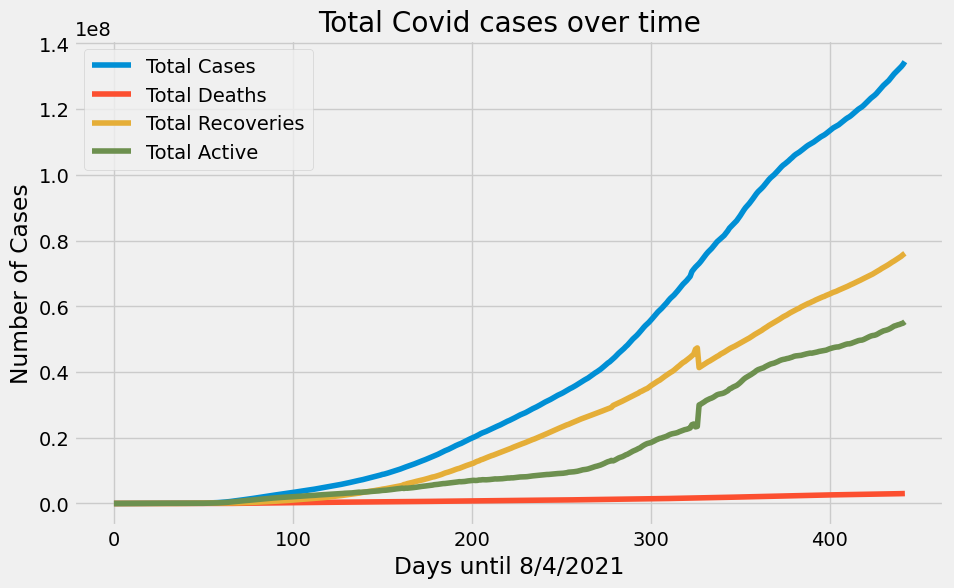

In [21]:
new_df = pd.DataFrame({'Total Cases' : total_cases, 'Total Deaths' : total_deaths,
                       'Total Recoveries' : total_recovered, 'Total Active' : total_active})
new_df.plot(kind = 'line', figsize = (10,6))
plt.title('Total Covid cases over time')
plt.xlabel('Days until 8/4/2021')
plt.ylabel('Number of Cases')

Text(0, 0.5, 'Number of Cases')

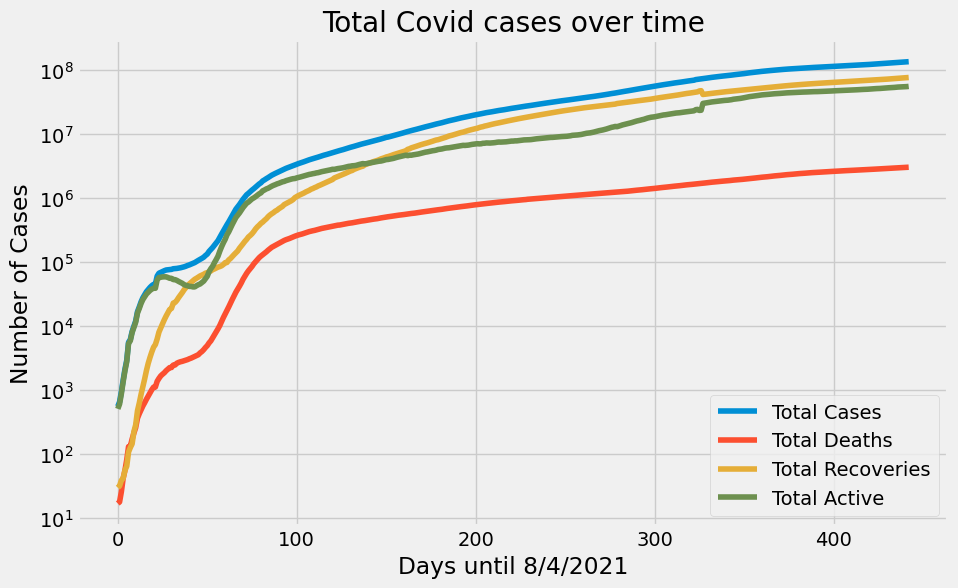

In [22]:
ax = new_df.plot(kind = 'line', figsize = (10,6))
ax.set_yscale('log')
ax.set_title('Total Covid cases over time')
ax.set_xlabel('Days until 8/4/2021')
ax.set_ylabel('Number of Cases')


## Bài toán 3
    Hiển thị tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc covid theo thời gian (đơn vị ngày) ở 4 biểu đồ riêng biệt bằng cách sử dụng biểu đồ đường.

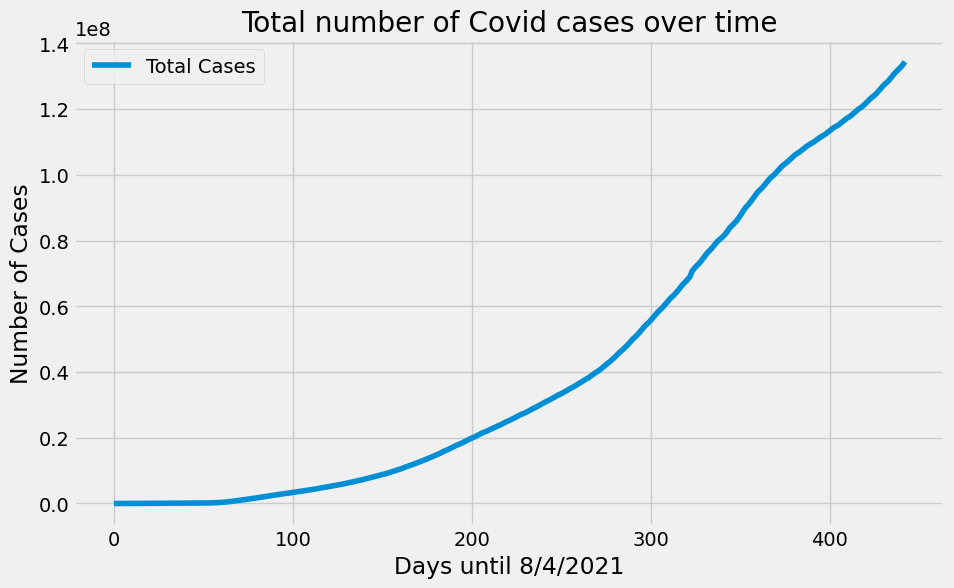

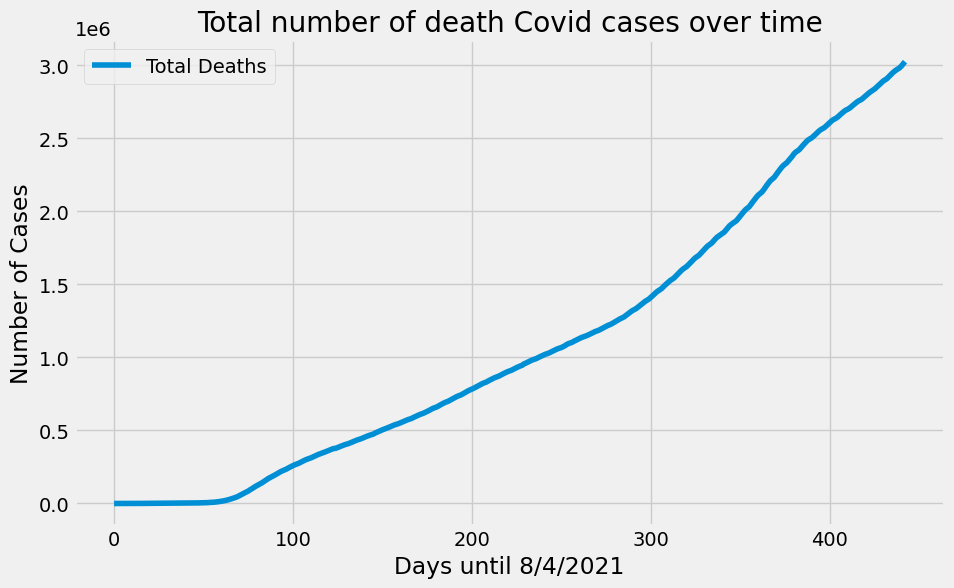

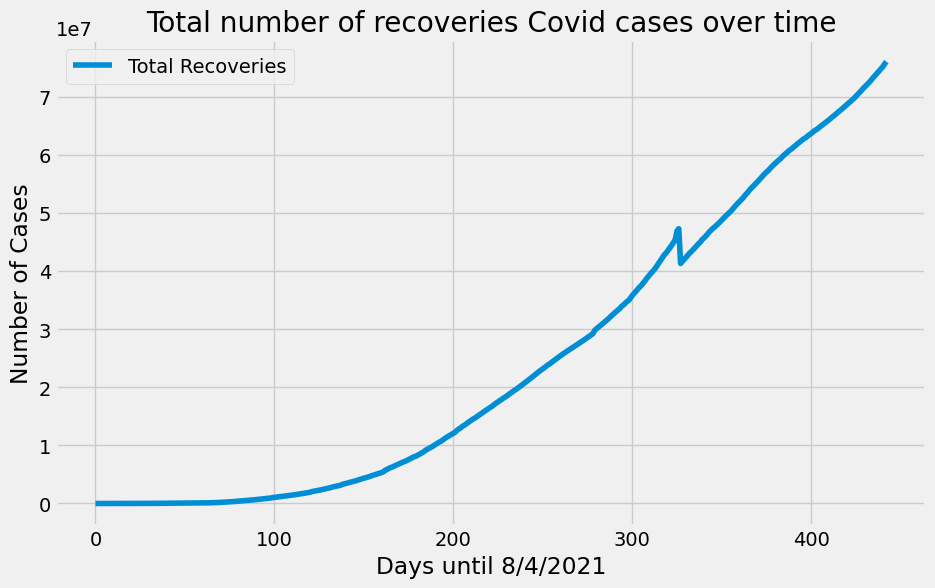

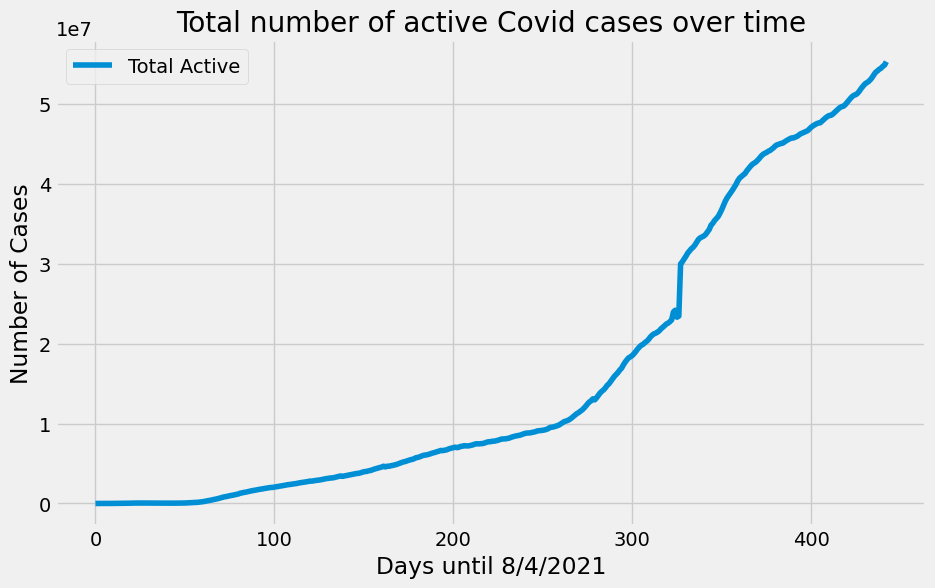

In [23]:
# Total confirmed cases plot
new_df[['Total Cases']].plot(kind = 'line', figsize = (10,6))
plt.title('Total number of Covid cases over time')
plt.xlabel('Days until 8/4/2021')
plt.ylabel('Number of Cases')
plt.show()

# Total death cases plot
new_df[['Total Deaths']].plot(kind = 'line', figsize = (10,6))
plt.title('Total number of death Covid cases over time')
plt.xlabel('Days until 8/4/2021')
plt.ylabel('Number of Cases')
plt.show()

# Total recovered cases plot
new_df[['Total Recoveries']].plot(kind = 'line', figsize = (10,6))
plt.title('Total number of recoveries Covid cases over time')
plt.xlabel('Days until 8/4/2021')
plt.ylabel('Number of Cases')
plt.show()

# Total active cases plot
new_df[['Total Active']].plot(kind = 'line', figsize = (10,6))
plt.title('Total number of active Covid cases over time')
plt.xlabel('Days until 8/4/2021')
plt.ylabel('Number of Cases')
plt.show()

## Bài toán 4
    Tính số lượng gia tăng hàng ngày về: tổng số ca mắc Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc Covid theo thời gian (đơn vị ngày).

In [24]:
#Nhập code ở đây:
# Create new columns and calculate the differences of cases each day
new_df['Total Cases Diff'] = new_df['Total Cases'].diff()
new_df['Total Deaths Diff'] = new_df['Total Deaths'].diff()
new_df['Total Recoveries Diff'] = new_df['Total Recoveries'].diff()
new_df['Total Active Diff'] = new_df['Total Active'].diff()

# Filt the first day different values (NA) with 0
new_df.fillna(int(0), inplace = True)

# Convert columns dtype from float to int
new_df['Total Cases Diff'] = new_df['Total Cases Diff'].astype('int')
new_df['Total Deaths Diff'] = new_df['Total Deaths Diff'].astype('int')
new_df['Total Recoveries Diff'] = new_df['Total Recoveries Diff'].astype('int')
new_df['Total Active Diff'] = new_df['Total Active Diff'].astype('int')

new_df.head()

Total Cases  Total Deaths  Total Recoveries  Total Active  \
0          557            17                30           510   
1          657            18                32           607   
2          944            26                39           879   
3         1437            42                42          1353   
4         2120            56                56          2008   

   Total Cases Diff  Total Deaths Diff  Total Recoveries Diff  \
0                 0                  0                      0   
1               100                  1                      2   
2               287                  8                      7   
3               493                 16                      3   
4               683                 14                     14   

   Total Active Diff  
0                  0  
1                 97  
2                272  
3                474  
4                655

## Bài toán 5
    Tính số lượng gia tăng hàng ngày về: tổng số ca mắc Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc Covid theo thời gian (đơn vị ngày ở 4 biểu đồ riêng biệt).

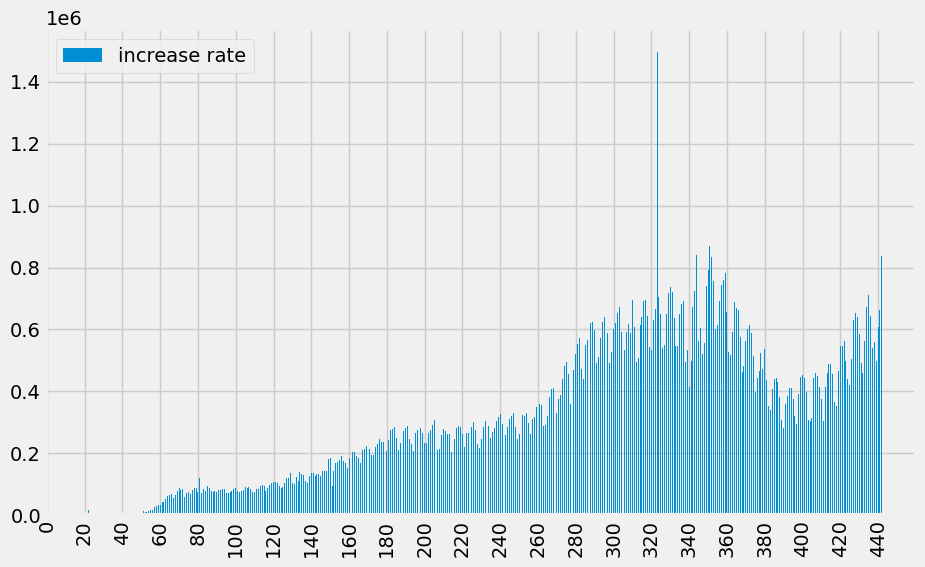

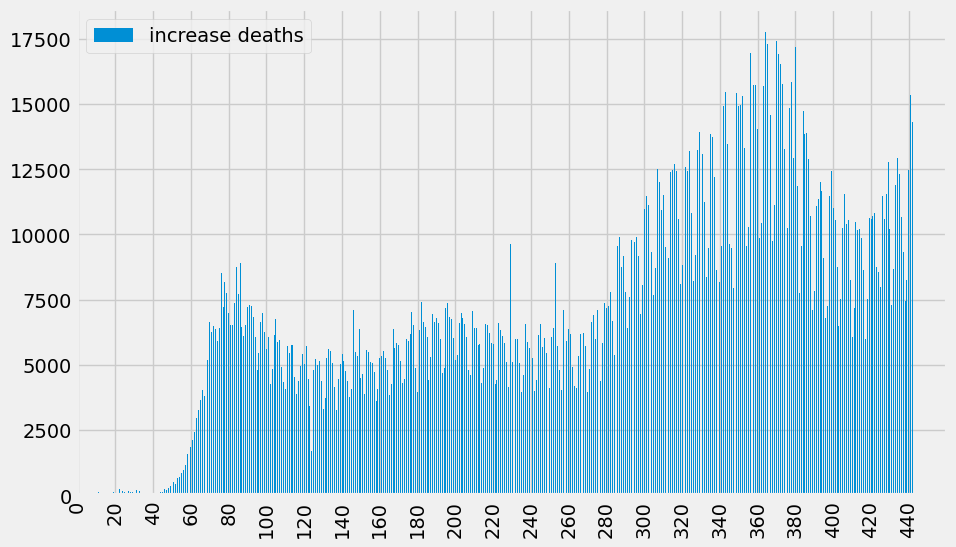

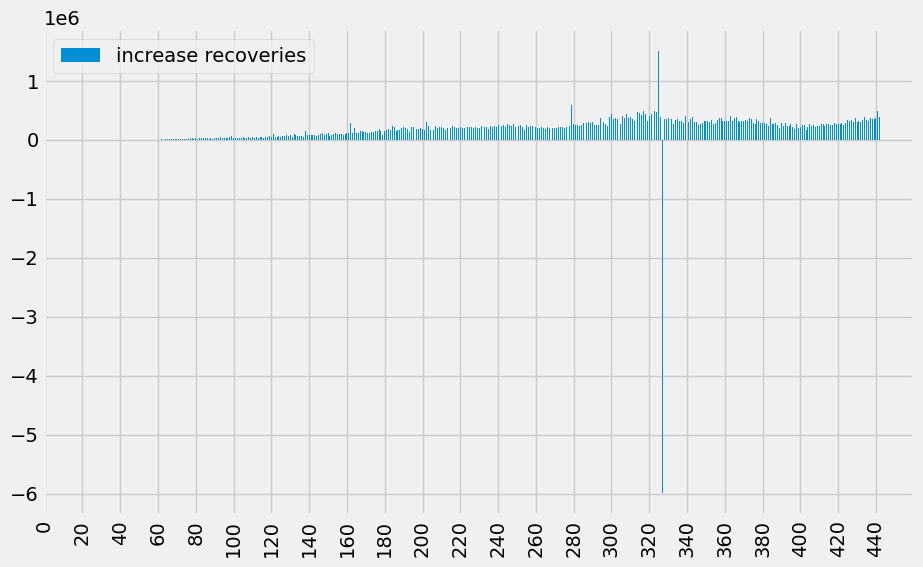

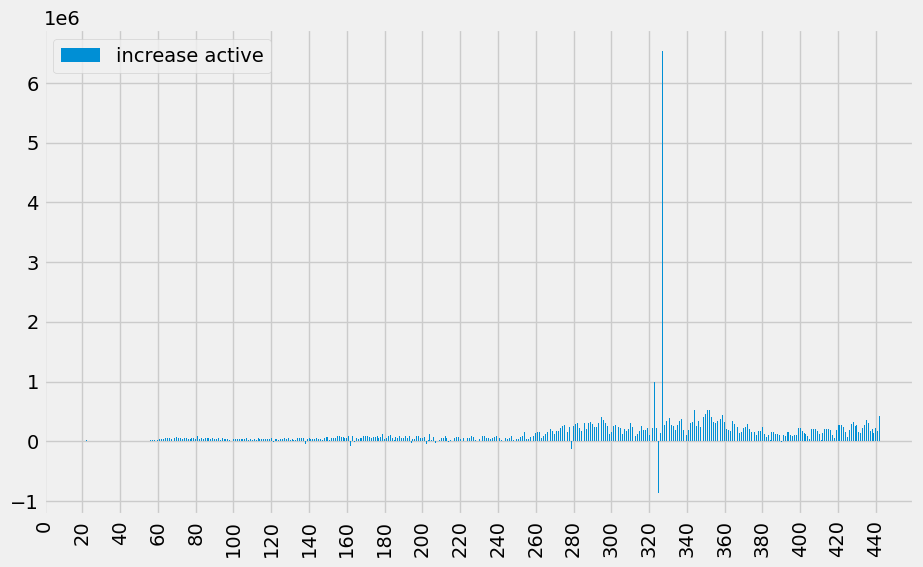

In [25]:
# Total cases diff
x_total_cases_diff = new_df['Total Cases Diff']
min_x_total_cases_diff = x_total_cases_diff.index.values.min()
max_x_total_cases_diff = x_total_cases_diff.index.values.max()

new_df['Total Cases Diff'].plot(kind = 'bar', figsize = (10,6))
plt.xticks(np.arange(min_x_total_cases_diff, max_x_total_cases_diff + 20, 20))
plt.legend(['increase rate'], loc = 'upper left')
plt.show()

# Total deaths diff
x_total_deaths_diff = new_df['Total Deaths Diff']
min_x_total_deaths_diff = x_total_deaths_diff.index.values.min()
max_x_total_deaths_diff = x_total_deaths_diff.index.values.max()

new_df['Total Deaths Diff'].plot(kind = 'bar', figsize = (10,6))
plt.xticks(np.arange(min_x_total_deaths_diff, max_x_total_deaths_diff + 20, 20))
plt.legend(['increase deaths'], loc = 'upper left')
plt.show()

# Total recoveries diff
x_total_recoveries_diff = new_df['Total Recoveries Diff']
min_x_total_recoveries_diff = x_total_recoveries_diff.index.values.min()
max_x_total_recoveries_diff = x_total_recoveries_diff.index.values.max()

new_df['Total Recoveries Diff'].plot(kind = 'bar', figsize = (10,6))
plt.xticks(np.arange(min_x_total_recoveries_diff, max_x_total_recoveries_diff + 20, 20))
plt.legend(['increase recoveries'], loc = 'upper left')
plt.show()

# Total active diff
x_total_active_diff = new_df['Total Active Diff']
min_x_total_active_diff = x_total_active_diff.index.values.min()
max_x_total_active_diff = x_total_active_diff.index.values.max()

new_df['Total Active Diff'].plot(kind = 'bar', figsize = (10,6))
plt.xticks(np.arange(min_x_total_active_diff, max_x_total_active_diff + 20, 20))
plt.legend(['increase active'], loc = 'upper left')
plt.show()

## Bài toán 6
    Tính phần trăm tỷ lệ tử vong toàn cầu và tỷ lệ hồi phục theo thời gian.

In [26]:
#Nhập code ở đây:
new_df['Total Deaths Pct'] = round(new_df['Total Deaths'] / new_df['Total Cases'] * 100,3)
new_df['Total Recoveries Pct'] = round(new_df['Total Recoveries'] / new_df['Total Cases'] * 100,3)
new_df

Total Cases  Total Deaths  Total Recoveries  Total Active  \
0            557            17                30           510   
1            657            18                32           607   
2            944            26                39           879   
3           1437            42                42          1353   
4           2120            56                56          2008   
..           ...           ...               ...           ...   
438    131805666       2974382          74498476      54332808   
439    132302655       2982636          74846289      54473730   
440    132910149       2995089          75216285      54698775   
441    133573288       3010448          75699590      54863250   
442    134409344       3024749          76094849      55289746   

     Total Cases Diff  Total Deaths Diff  Total Recoveries Diff  \
0                   0                  0                      0   
1                 100                  1                      2   
2                 287                  8                      7   
3                 493                 16                      3   
4                 683                 14                     14   
..                ...                ...                    ...   
438            559922               7428                 348188   
439            496989               8254                 347813   
440            607494              12453                 369996   
441            663139              15359                 483305   
442            836056              14301                 395259   

     Total Active Diff  Total Deaths Pct  Total Recoveries Pct  
0                    0             3.052                 5.386  
1                   97             2.740                 4.871  
2                  272             2.754                 4.131  
3                  474             2.923                 2.923  
4                  655             2.642                 2.642  
..                 ...               ...                   ...  
438             204306             2.257                56.521  
439             140922             2.254                56.572  
440             225045             2.253                56.592  
441             164475             2.254                56.673  
442             426496             2.250                56.614  

[443 rows x 10 columns]

## Bài toán 7
**7.1** 

    Hiển thị tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để hiển thị tỷ lệ tử vong trung bình theo thời gian.

Text(0, 0.5, 'Mortality Rate')

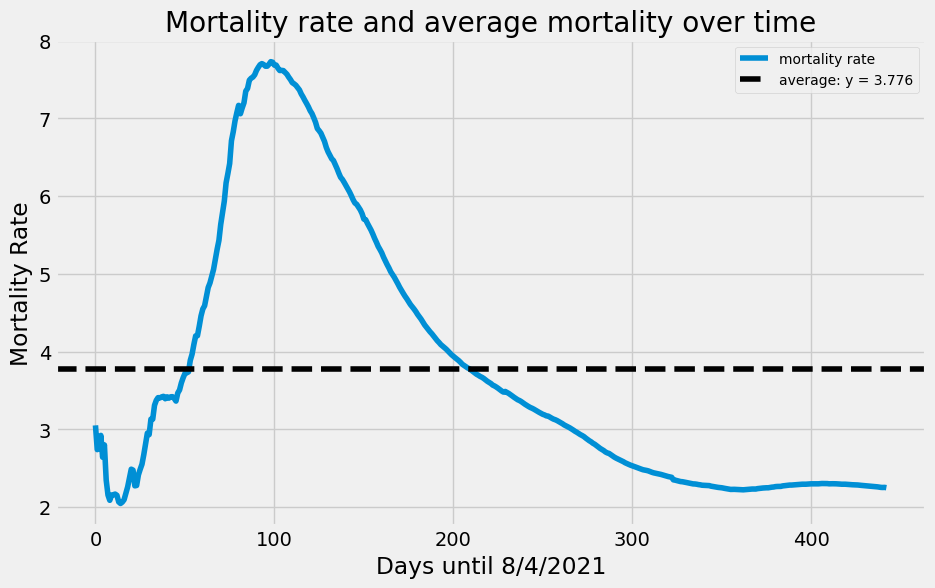

In [27]:
# Get the mean value of mortality rate
mortality_mean = round(new_df['Total Deaths Pct'].mean(), 3)

# Creating plot
new_df['Total Deaths Pct'].plot(kind = 'line', figsize = (10,6))
plt.axhline(y=mortality_mean, color='black', linestyle='--')
plt.legend(['mortality rate', 'average: y = ' + str(mortality_mean)], 
           loc = 'upper right', prop={'size': 10})
plt.title('Mortality rate and average mortality over time')
plt.xlabel('Days until 8/4/2021')
plt.ylabel('Mortality Rate')

**7.2** 

    Hiển thị tỷ lệ hồi phục theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để hiển thị tỷ lệ tử vong trung bình theo thời gian.

Text(0, 0.5, 'Recoveries Rate')

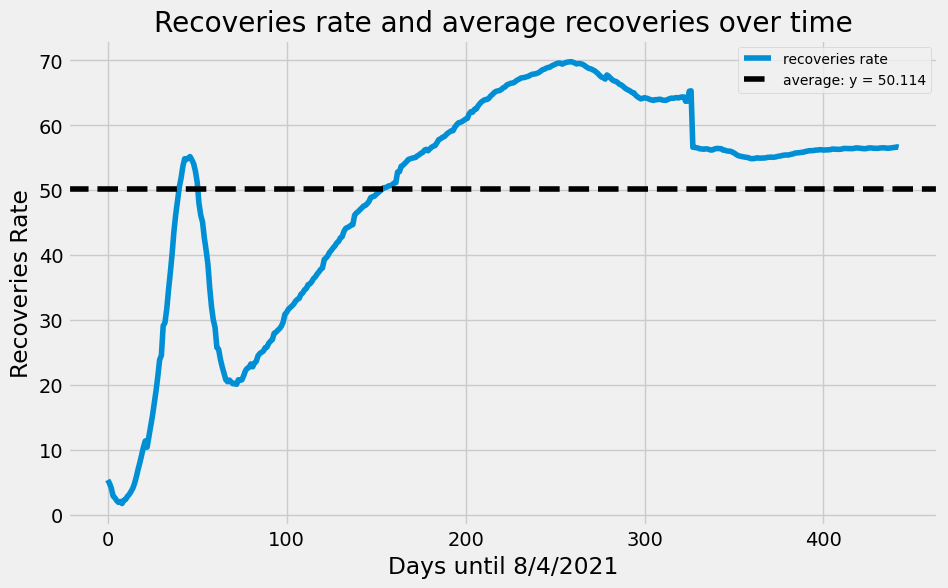

In [28]:
# Get the mean value of recoverd rate
recoveries_mean = round(new_df['Total Recoveries Pct'].mean(), 3)

# Creating plot
new_df['Total Recoveries Pct'].plot(kind = 'line', figsize = (10,6))
plt.axhline(y=recoveries_mean, color='black', linestyle='--')
plt.legend(['recoveries rate', 'average: y = ' + str(recoveries_mean)], 
           loc = 'upper right', prop={'size': 10})
plt.title('Recoveries rate and average recoveries over time')
plt.xlabel('Days until 8/4/2021')
plt.ylabel('Recoveries Rate')

#  6. Phân tích theo châu lục

## Tiền xử lý dữ liệu

In [29]:
# Thay đổi tên quốc gia theo yêu cầu của pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# nhận tất cả các quốc gia
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code thành Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Định nghĩa hàm để nhận continent code cho quốc gia.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


## Bài toán 8
    Thêm trường "continent" vào tập dữ liệu confirm_df, death_df và recorveries_df:

In [30]:
# Initialize an empty continent string
continent_confirmed_str = ''

# using loop and apply function from the previous block to get the string contained continent code
for country in countries:
    continent_confirmed_str += country_to_continent_code(country)
    continent_confirmed_str += ','

# Using split() to get the list of continent code and delete the last element of the list(empty)
continent_confirmed_list = continent_confirmed_str.split(',')
continent_confirmed_list = continent_confirmed_list[ : -1]

# Using insert() to add new column named "Continent" next  to "Country/Region" column
confirmed_df.insert(loc = 2, column = 'Continent', value = continent_confirmed_list)

# Change the value in Continent column from continent code to name of continent
confirmed_df['Continent'] = confirmed_df['Continent'].map(continents)

# Print out the result
confirmed_df.head()

Province/State Country/Region Continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   
3            NaN        Andorra    Europe  42.50630   1.521800        0   
4            NaN         Angola    Africa -11.20270  17.873900        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  3/30/21  3/31/21  4/1/21  4/2/21  \
0        0        0        0        0  ...    56384    56454   56517   56572   
1        0        0        0        0  ...   124723   125157  125506  125842   
2        0        0        0        0  ...   117061   117192  117304  117429   
3        0        0        0        0  ...    11944    12010   12053   12115   
4        0        0        0        0  ...    22182    22311   22399   22467   

   4/3/21  4/4/21  4/5/21  4/6/21  4/7/21  4/8/21  
0   56595   56676   56717   56779   56873   56943  
1  126183  126531  126795  126936  127192  127509  
2  117524  117622  117739  117879  118004  118116  
3   12174   12231   12286   12328   12363   12409  
4   22579   22631   22717   22885   23010   23108  

[5 rows x 448 columns]

In [31]:
# Initialize an empty continent string
continent_deaths_str = ''

# using loop and apply function from the previous block to get the string contained continent code
for country in countries1:
    continent_deaths_str += country_to_continent_code(country)
    continent_deaths_str += ','

# Using split() to get the list of continent code and delete the last element of the list(empty)
continent_deaths_list = continent_deaths_str.split(',')
continent_deaths_list = continent_deaths_list[ : -1]

# Using insert() to add new column named "Continent" next  to "Country/Region" column
deaths_df.insert(loc = 2, column = 'Continent', value = continent_deaths_list)

# Change the value in Continent column from continent code to name of continent
deaths_df['Continent'] = deaths_df['Continent'].map(continents)

#Print out the result
deaths_df.head()

Province/State Country/Region Continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   
3            NaN        Andorra    Europe  42.50630   1.521800        0   
4            NaN         Angola    Africa -11.20270  17.873900        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  3/30/21  3/31/21  4/1/21  4/2/21  \
0        0        0        0        0  ...     2476     2484    2489    2495   
1        0        0        0        0  ...     2227     2235    2241    2247   
2        0        0        0        0  ...     3089     3093    3096    3099   
3        0        0        0        0  ...      115      115     115     116   
4        0        0        0        0  ...      536      537     538     538   

   4/3/21  4/4/21  4/5/21  4/6/21  4/7/21  4/8/21  
0    2496    2497    2508    2512    2512    2516  
1    2256    2265    2274    2283    2291    2297  
2    3102    3105    3108    3112    3116    3119  
3     117     117     117     117     119     120  
4     540     542     543     547     547     549  

[5 rows x 448 columns]

In [32]:
#insert Continent col in recoveries_df
continent_recoveries_str = ''

# using loop and apply function from the previous block to get the string contained continent code
for country in countries2:
    continent_recoveries_str += country_to_continent_code(country)
    continent_recoveries_str += ','

# Using split() to get the list of continent code and delete the last element of the list(empty)   
continent_recoveries_list = continent_recoveries_str.split(',')
continent_recoveries_list = continent_recoveries_list[ : -1]

# Using insert() to add new column named "Continent" next  to "Country/Region" column
recoveries_df.insert(loc = 2, column = 'Continent', value = continent_recoveries_list)

# Change the value in Continent column from continent code to name of continent
recoveries_df['Continent'] = recoveries_df['Continent'].map(continents)

# Print out the result
recoveries_df.head()

Province/State Country/Region Continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   
3            NaN        Andorra    Europe  42.50630   1.521800        0   
4            NaN         Angola    Africa -11.20270  17.873900        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  3/30/21  3/31/21  4/1/21  4/2/21  \
0        0        0        0        0  ...    51473    51550   51788   51798   
1        0        0        0        0  ...    90617    91271   91875   92500   
2        0        0        0        0  ...    81442    81538   81632   81729   
3        0        0        0        0  ...    11276    11315   11365   11401   
4        0        0        0        0  ...    20446    20493   20508   20867   

   4/3/21  4/4/21  4/5/21  4/6/21  4/7/21  4/8/21  
0   51802   51885   51902   51928   51940   51956  
1   93173   93842   94431   95035   95600   96129  
2   81813   81896   81994   82096   82192   82289  
3   11428   11474   11523   11570   11616   11692  
4   20871   20879   21452   21489   21545   21557  

[5 rows x 448 columns]

## Bài toán 9
    Tạo data frame country_df với chỉ mục là trường "Country/Region".
    Các cột thông tin này gồm:
    - continent: Châu lục.
    - Confirmed: Tổng số ca mắc.
    - Deaths: Tổng số ca tử vong.
    - Recoveries: Tổng số ca hồi phục.
    - Active: Tổng số ca còn mắc Covid.
    - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [33]:
new_confirmed_df.loc[new_confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
new_confirmed_df.loc[new_confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
new_confirmed_df.loc[new_confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
new_confirmed_df.loc[new_confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
new_confirmed_df.loc[new_confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
new_confirmed_df.loc[new_confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
new_confirmed_df.loc[new_confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
new_confirmed_df.loc[new_confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
new_confirmed_df.loc[new_confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
# First, create country_df containing 4 columns('Country/ Region', 'Confirmed', 'Deaths', 'Recoveries') 
# that are retrieved values from new_confirmed_df, new_death_df, and new_recoveries_df
country_df = pd.DataFrame({'Country/Region' : new_confirmed_df['Country/Region'],
                          'Confirmed' : new_confirmed_df['Total'],
                          'Deaths' : new_death_df['Total'],
                          'Recoveries' : new_recoveries_df['Total']})

# Create Active column
country_df['Active'] = country_df['Confirmed'] - country_df['Deaths'] - country_df['Recoveries']

# Create Mortality column
country_df['Mortality Rate'] = round(country_df['Deaths'] / country_df['Confirmed'] *100, 3)

# Fill NA value in Mortality Rate column with 0 since there are some countries that did not
# recored any Covid cases such as Winter Olympics 2022
country_df['Mortality Rate'].fillna(0, inplace = True)

# Applying similar step in the previous tasks, create new column Continent
countries_in_countries_df = np.asarray(country_df["Country/Region"])

continent_in_countries_df_str = ''
for country in countries_in_countries_df:
    continent_in_countries_df_str += country_to_continent_code(country)
    continent_in_countries_df_str += ','
    
continent_in_countries_df_list = continent_in_countries_df_str.split(',')
continent_in_countries_df_list = continent_in_countries_df_list[ : -1]

country_df.insert(loc = 1, column = 'Continent', value = continent_in_countries_df_list)

# Set 'Country/Region' as the index of country_df
country_df.set_index('Country/Region', inplace = True)

# Change value of Continent column from continent code to continent name
country_df['Continent'] = country_df['Continent'].map(continents)

# Print out the result
country_df

Continent  Confirmed  Deaths  Recoveries   Active  \
Country/Region                                                           
Afghanistan               Asia   13916852  532454    10717264  2667134   
Albania                 Europe   13091171  253856     8151444  4685871   
Algeria                 Africa   21411872  667014    14588781  6156077   
Andorra                 Europe    1705794   25720     1513087   166987   
Angola                  Africa    3341298   84533     2436948   819817   
...                        ...        ...     ...         ...      ...   
West Bank and Gaza      Others   26812934  274744    23071356  3466834   
Winter Olympics 2022    Others          0       0           0        0   
Yemen                     Asia     643676  175432      365731   102513   
Zambia                  Africa    8809063  142162     8042392   624509   
Zimbabwe                Africa    4535581  157219     3771965   606397   

                      Mortality Rate  
Country/Region                        
Afghanistan                    3.826  
Albania                        1.939  
Algeria                        3.115  
Andorra                        1.508  
Angola                         2.530  
...                              ...  
West Bank and Gaza             1.025  
Winter Olympics 2022           0.000  
Yemen                         27.255  
Zambia                         1.614  
Zimbabwe                       3.466  

[201 rows x 6 columns]

## Bài toán 10
    Tạo data frame continents_df với chỉ mục là trường "continent".
    Các cột thông tin này gồm: 
    - Confirmed: Tổng số ca mắc.
    - Deaths: Tổng số ca tử vong.
    - Recoveries: Tổng số ca hồi phục.
    - Active: Tổng số ca còn mắc Covid.
    - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [34]:
# Create continents_df containing 5 columns first
continents_df = pd.DataFrame({'Continent' : country_df['Continent'].values,
                       'Confirmed' : country_df['Confirmed'].values,
                       'Deaths' : country_df['Deaths'].values,
                       'Recoveries' : country_df['Recoveries'].values,
                       'Active' : country_df['Active'].values})

# Using groupby() to calculate total cases in each continent
continents_df = continents_df.groupby('Continent')[['Confirmed', 'Deaths', 
                                                    'Recoveries', 'Active']].sum()

# Create Mortality Rate column 
continents_df['Mortality Rate'] = round(continents_df['Deaths'] / continents_df['Confirmed'] * 100, 3)

# Print out the result
continents_df

Confirmed     Deaths  Recoveries      Active  Mortality Rate
Continent                                                                   
Africa          657815776   16459184   548306315    93050277           2.502
Asia           4441312131   76046066  3962818215   402447850           1.712
Australia         8929771     234427     6848165     1847179           2.625
Europe         4974381920  145880836  2386460886  2442040198           2.933
North America  5103934683  134796775  1045246918  3923890990           2.641
Others           58171752    1008323    49167750     7995679           1.733
South America  3210416219  108561895  2793083156   308771168           3.382

## Mẫu biểu đồ đường
Dưới đây là các hàm mẫu để trực quan hóa các trường hợp mắc Covid theo thời gian ở mỗi lục địa/quốc gia:

In [35]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Vẽ Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Trục y
    plt.yscale(scale)
    plt.minorticks_on()
    # Vẽ các nhãn theo trục
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases_5(confirmed, deaths,
                          continent = None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["Continent",continent]
    elif country != None:
        params = ["Country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Vẽ các nhãn trục
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Vẽ các tham số
    plot_params(ax,axis_label,scale = scale)
    
    # Vẽ Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Vị trí Legend 
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def visualize_covid_cases_7(confirmed, deaths, recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths", "Recoveries"]
    if continent != None:
        params = ["Continent",continent]
    elif country != None:
        params = ["Country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Vẽ nhãn trục
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Vẽ tham số
    plot_params(ax,axis_label,scale = scale)
    
    # Vẽ Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Vị trí Legend
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()        


## Bài toán 11
**11.1** 

    Áp dụng hàm visual_covid_case để hiển thị trực quan hóa của 7 lục địa trong 7 biểu đồ đường riêng biệt. Thứ tự của các trực quan hóa được sắp xếp theo thứ tự giảm dần theo số ca mắc được xác nhận. 
    

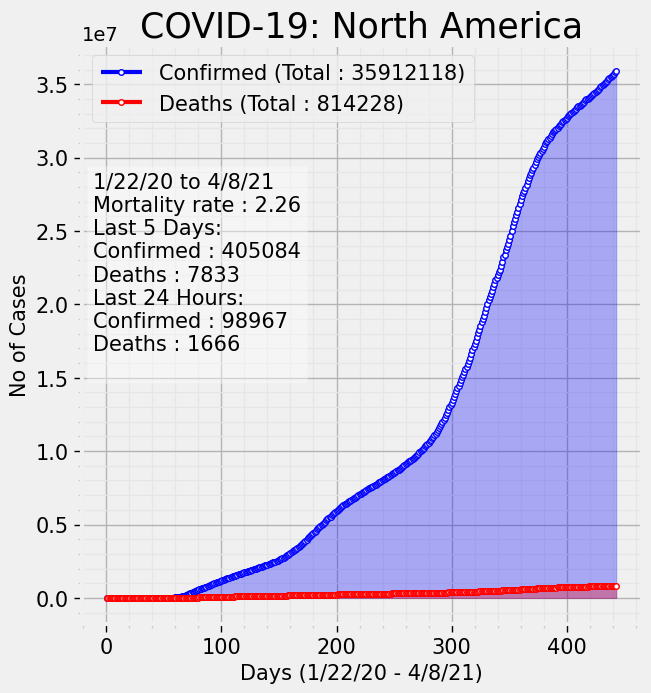

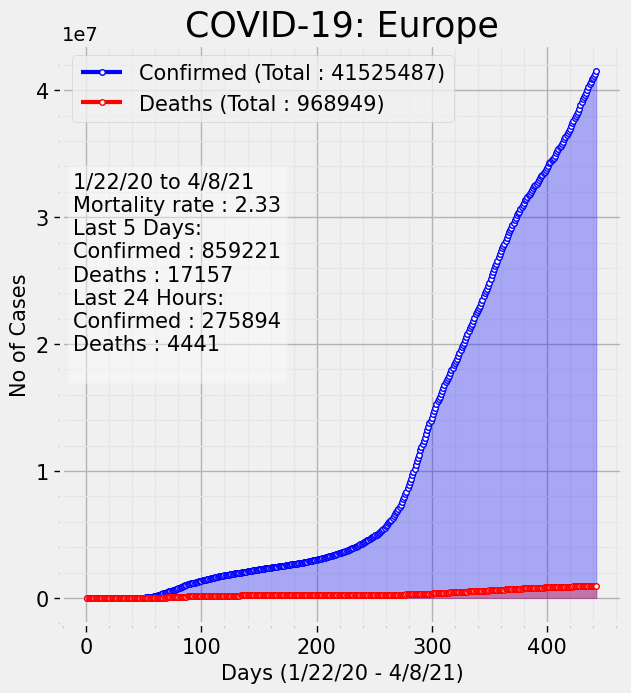

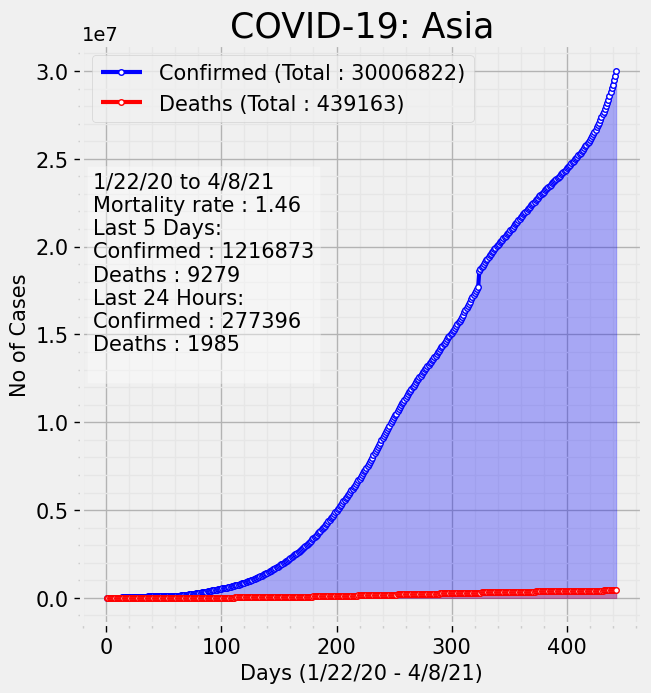

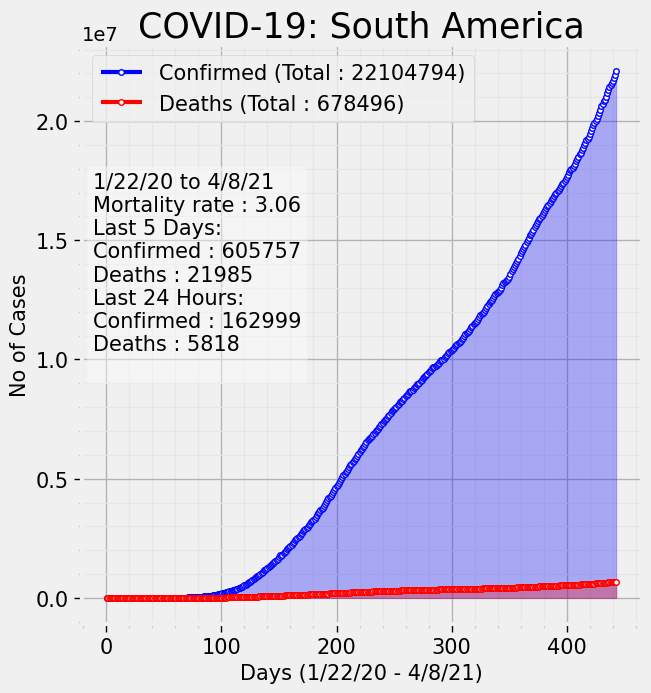

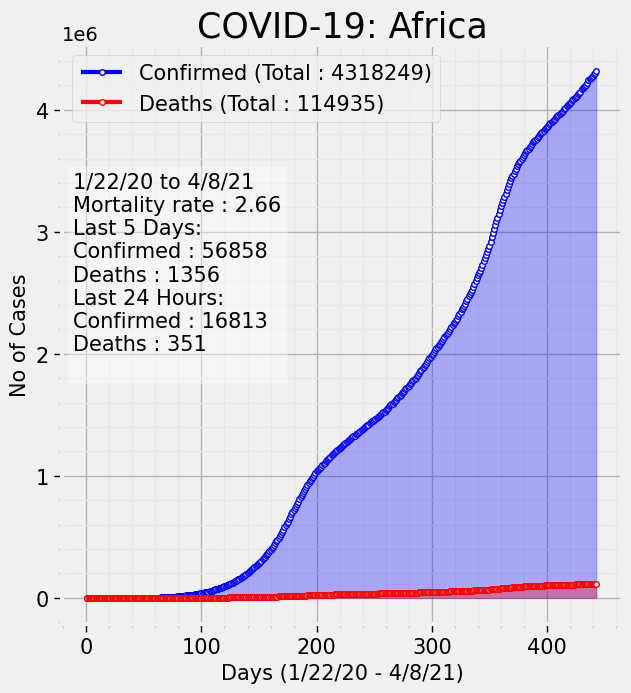

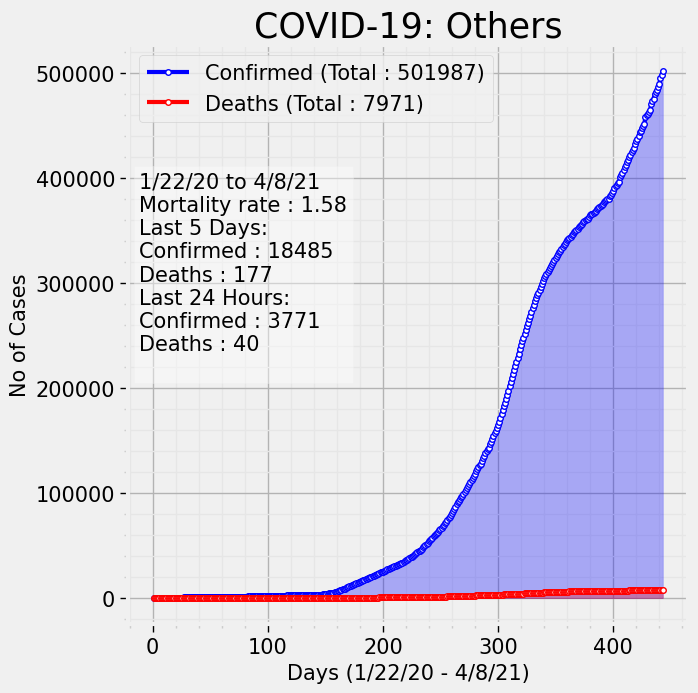

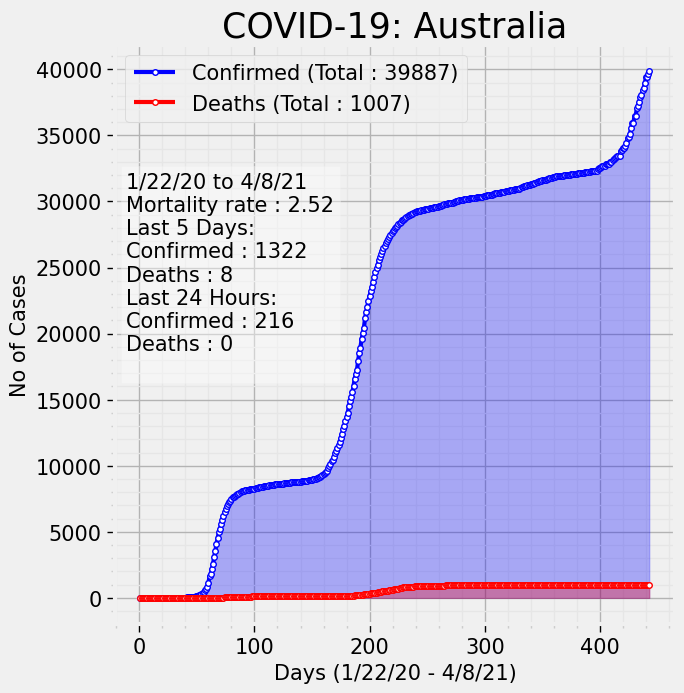

In [36]:
new_confirmed = confirmed_df
new_deaths = deaths_df

# Get the list of continent
continent_sort = continents_df['Confirmed'].sort_values(ascending = False).index.values

for value in continent_sort:
    visualize_covid_cases_5(new_confirmed, new_deaths, value)



**11.2**

    Sửa đổi hàm "plot_params" và "visual_covid_case" thành:
    - Hiển thị kết quả của 7 ngày gần nhất thay vì 5 ngày.
    - Thêm "Recoveries line" vào biểu đồ chính.
    - Thêm số "Total Recoveries" vào bảng nhỏ
    - Thêm "Recoveries" được điền trong 7 ngày và 24 giờ qua vào menu thông tin.

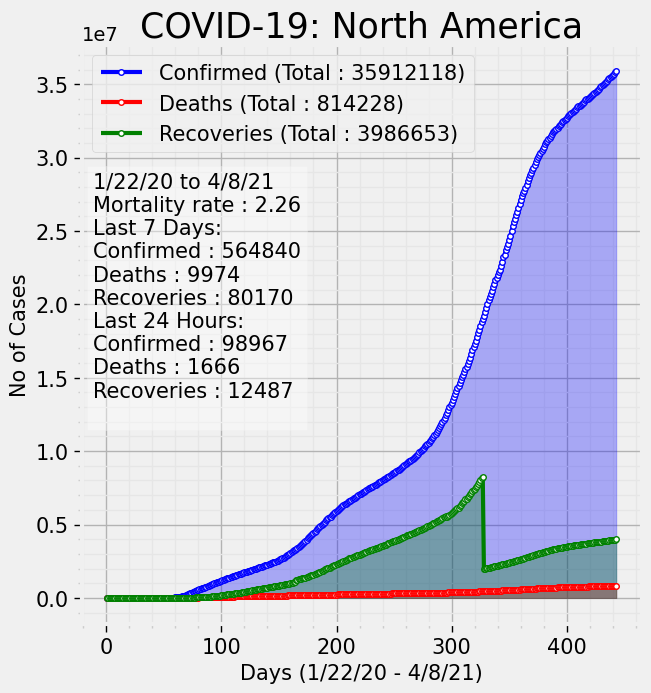

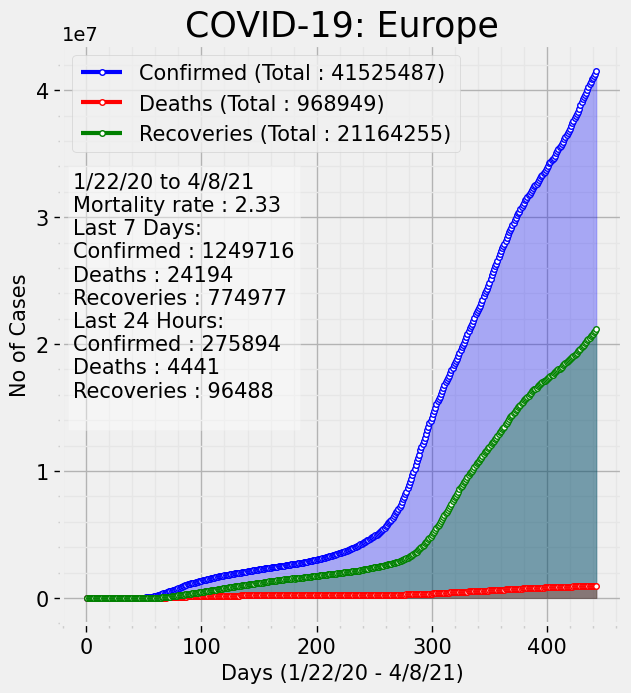

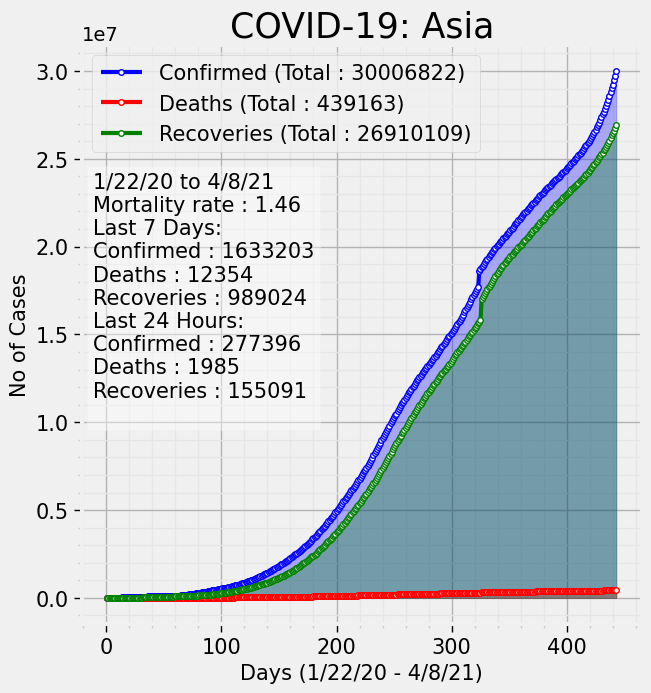

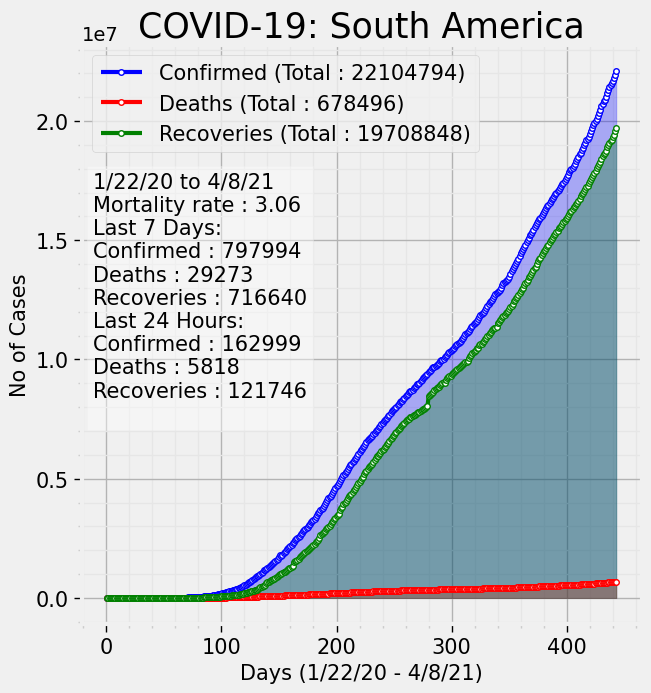

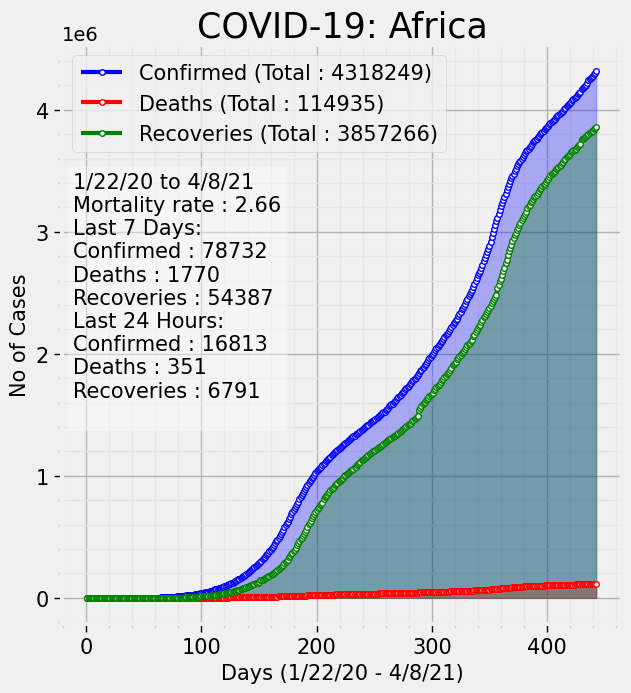

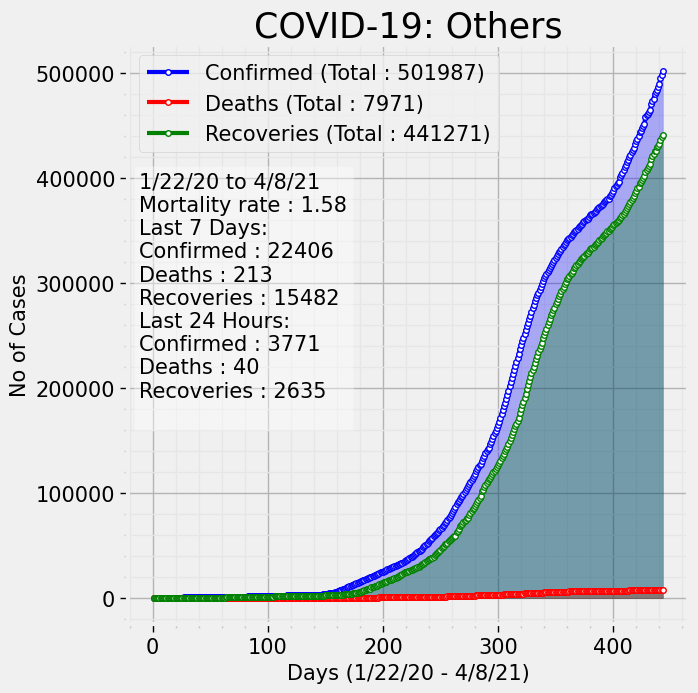

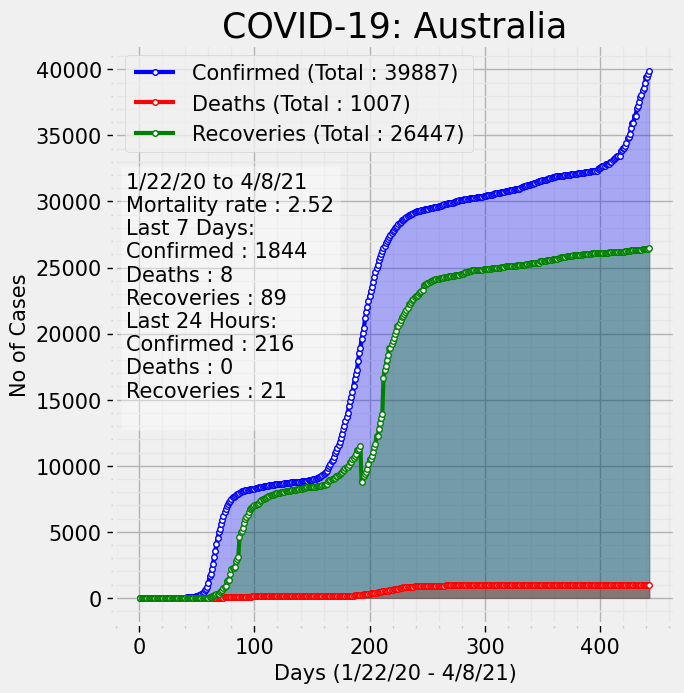

In [37]:
new_confirmed = confirmed_df
new_deaths = deaths_df
new_recoveries = recoveries_df

# Get the list of continent
continent_sort = continents_df['Confirmed'].sort_values(ascending = False).index.values

for value in continent_sort:
    visualize_covid_cases_7(new_confirmed, new_deaths, new_recoveries,value)

## Bài toán 12
    Trực quan hóa ma trận hiệp phương sai cho continents_df.

Text(0.5, 1.0, 'Correlation Matrix of Data')

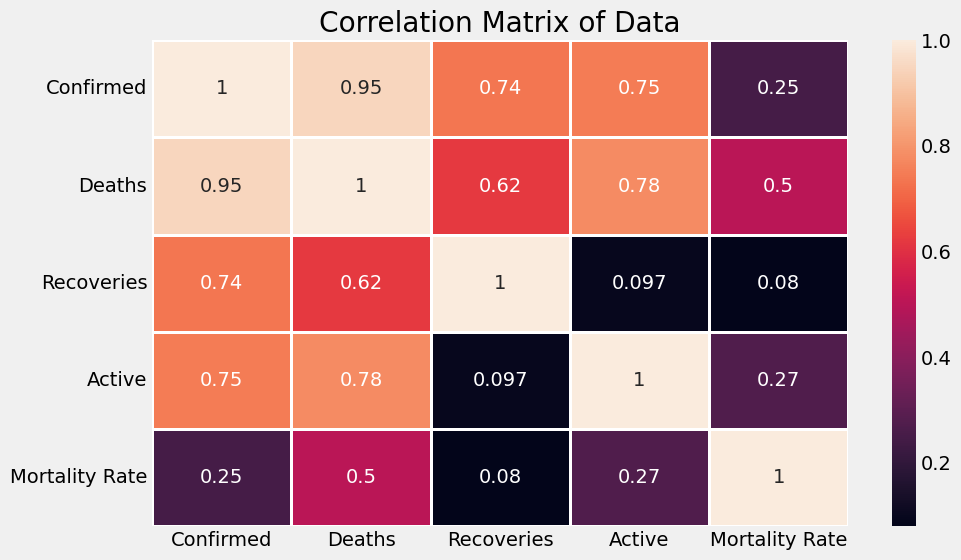

In [38]:
f, ax = plt.subplots(figsize=(10, 6))
corr = continents_df.corr()
sns.heatmap(corr, linewidths = .8, annot=True)
ax.set_title('Correlation Matrix of Data')

## Bài toán 13
    Xây dựng biểu đồ tròn để so sánh tỷ lệ số ca mắc được xác nhận, số ca tử vong, số ca phục hồi và số ca vẫn còn mắc của 7 châu lục.
    Mỗi trường (confirm, deaths, ...) nên được trình bày trong các biểu đồ tròn khác nhau.
    Bạn không được sử dụng đoạn code lặp lại ở đây, hãy thử sử dụng vòng lặp for.
    Mỗi châu lục nên được trình bày bằng các màu sắc khác nhau.

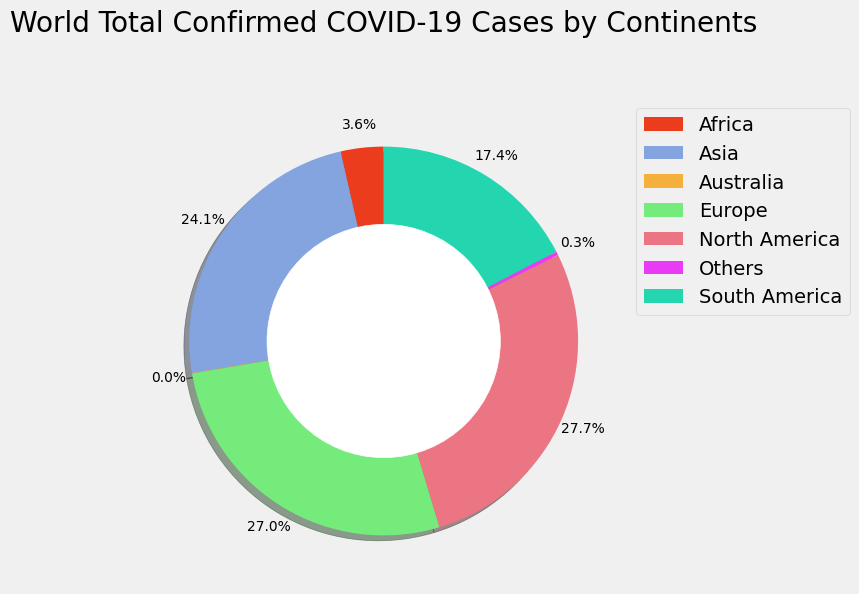

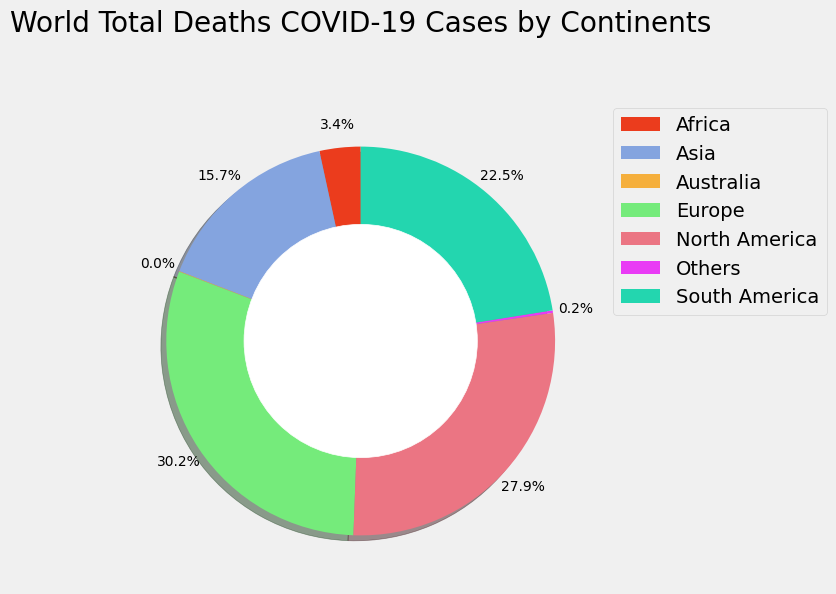

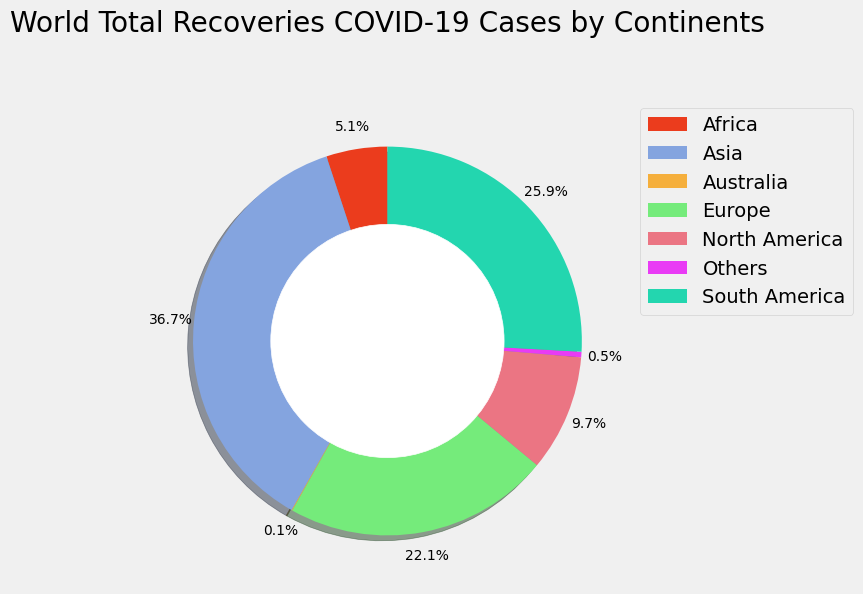

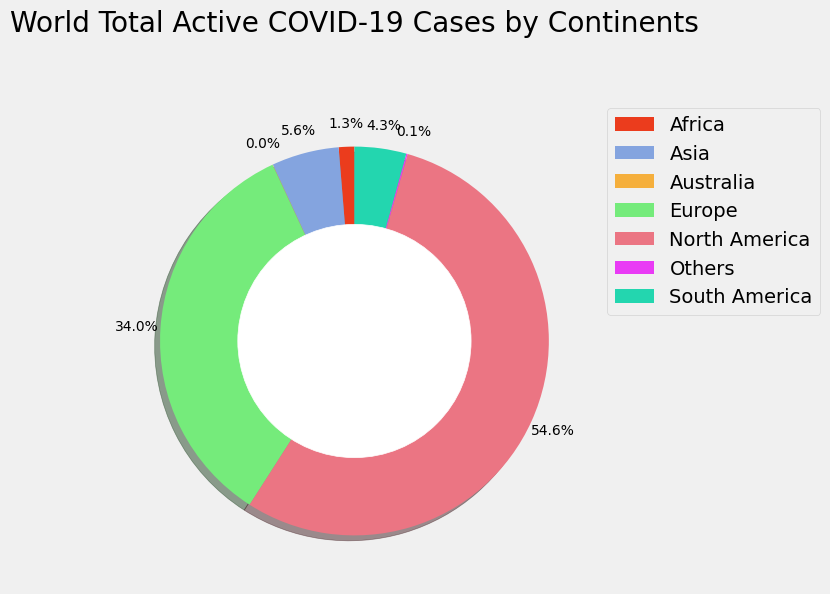

In [39]:
colors_list = ['#EB3C1D', '#84A4DF', '#F5AF3C', '#75EB7B', '#EB7583', '#E93BF5', '#23D6AF']
explode_list = [0, 0, 0, 0, 0, 0, 0]

# Get the element list except the last one (mortality do not need to draw)
element_list = continents_df.columns.values[:-1]
for element in element_list:
    continents_df[element].plot(kind = 'pie',
                    figsize = (8, 6),
                    autopct = '%1.1f%%',
                    textprops={'fontsize': 10},
                    startangle = 90,
                    shadow = True,
                    labels = None,
                    pctdistance = 1.12,
                    colors = colors_list,
                    explode = explode_list)
    plt.title('World Total ' + element + ' COVID-19 Cases by Continents', y = 1.12, loc = 'center')
    plt.axis('off')
    circle = plt.Circle((0, 0), 0.6, color = 'white')
    p = plt.gcf()
    p.gca().add_artist(circle)
    plt.legend(labels = continents_df.index.values, loc = 'best', bbox_to_anchor=(1, 1))
    plt.show()

# 7. Phân tích theo quốc gia

## Bài toán 14
    Xây dựng bản đồ folium để hiển thị số ca được xác nhận, số ca tử vong, số ca phục hồi và tỷ lệ tử vong của mỗi quốc gia dựa trên vị trí của các quốc gia. Bán kính của vòng tròn tỷ lệ thuận với số ca được xác nhận.


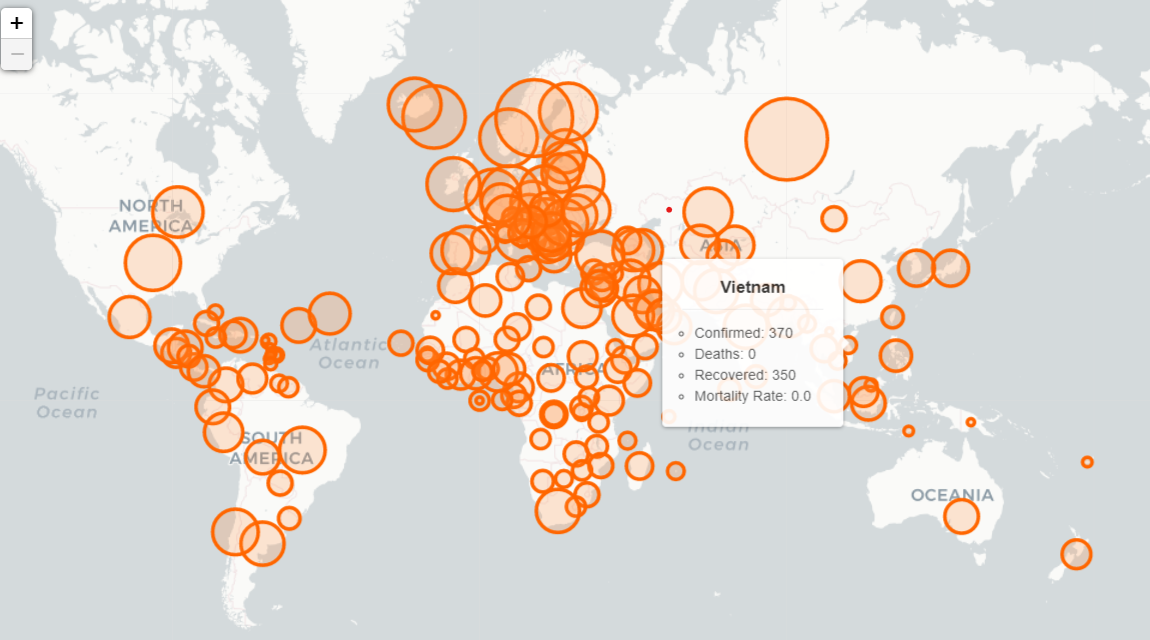

In [40]:
# Get the mean of lat and long of each Country/Region
lat_mean_df = confirmed_df.groupby(['Country/Region'])['Lat'].mean().reset_index()
long_mean_df = confirmed_df.groupby(['Country/Region'])['Long'].mean().reset_index()

# Insert those into country_df
country_df = country_df.reset_index()
country_df.insert(loc = 2, column = 'Lat', value = lat_mean_df['Lat'])
country_df.insert(loc = 3, column = 'Long', value = long_mean_df['Long'])
country_df

Country/Region Continent        Lat        Long  Confirmed  Deaths  \
0             Afghanistan      Asia  33.939110   67.709953   13916852  532454   
1                 Albania    Europe  41.153300   20.168300   13091171  253856   
2                 Algeria    Africa  28.033900    1.659600   21411872  667014   
3                 Andorra    Europe  42.506300    1.521800    1705794   25720   
4                  Angola    Africa -11.202700   17.873900    3341298   84533   
..                    ...       ...        ...         ...        ...     ...   
196    West Bank and Gaza    Others  31.952200   35.233200   26812934  274744   
197  Winter Olympics 2022    Others  39.904200  116.407400          0       0   
198                 Yemen      Asia  15.552727   48.516388     643676  175432   
199                Zambia    Africa -13.133897   27.849332    8809063  142162   
200              Zimbabwe    Africa -19.015438   29.154857    4535581  157219   

     Recoveries   Active  Mortality Rate  
0      10717264  2667134           3.826  
1       8151444  4685871           1.939  
2      14588781  6156077           3.115  
3       1513087   166987           1.508  
4       2436948   819817           2.530  
..          ...      ...             ...  
196    23071356  3466834           1.025  
197           0        0           0.000  
198      365731   102513          27.255  
199     8042392   624509           1.614  
200     3771965   606397           3.466  

[201 rows x 9 columns]

In [41]:
confimed_cases = country_df['Confirmed'].sort_values(ascending = False)

max_cases = confimed_cases[0]

# Create function to set the radius proportion      
def get_radius(x):
    if(x == 0):
        return 1
    elif(x == max_cases):
        return 20000
    else:
        radius = round(x * 20000 / max_cases, 2)
        return radius


In [42]:
m = folium.Map(tiles='CartoDB positron', zoom_start=2)

for i in range(country_df.shape[0]):
    Confirm = country_df.iloc[i,4]
    Deaths = country_df.iloc[i,5]
    Recoverd = country_df.iloc[i,6]
    Mortality_Rate = country_df.iloc[i,8]
    
    html="""<div style=\"height:150px; width: 180px; margin:0 auto;\">
                <p align=\"center\"><b>""" + str(country_df.iloc[i, 0]) + """</b></p>
                <hr  width=\"100px\" size=\"1px\" align=\"center\"
                <ul>
                  <li>Confirm: """ + str(Confirm) + """</li>
                  <li>Deaths: """ + str(Deaths) + """</li>
                  <li>Recoverd: """ + str(Recoverd) + """</li>
                  <li>Mortality Rate: """ + str(Mortality_Rate) + """</li>
                </ul>
    </div>"""

    folium.Circle(
        location= [country_df.iloc[i,2], country_df.iloc[i,3]],
        radius= get_radius(Confirm),
        color='#FE9A2E',
        fill=True,
        popup = html,
        opacity = 0.8,
        fill_color='#FE9A2E'
    ).add_to(m)

m

## Bài toán 15
Xây dựng bản đồ px [(plotly.express)](https://plotly.com/python/plotly-express/) để hiển thị số ca còn mắc Covid của mỗi quốc gia trong log(10) dựa trên tên các quốc gia bằng cách sử dụng màu "quang phổ".

In [43]:
!wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [44]:
# First, check Country/Region with 'Others' Continent
mask = country_df['Continent'] == 'Others'
country_df[mask]

Country/Region Continent        Lat        Long  Confirmed  Deaths  \
5              Antarctica    Others -71.949900   23.347000          0       0   
28                  Burma    Others  21.916200   95.956000   20429534  453411   
49       Diamond Princess    Others  11.825100   42.590300     297620    5089   
76               Holy See    Others  15.200000  -86.241900       7075       0   
93           Korea, North    Others  42.602636   20.902977          0       0   
95                 Kosovo    Others  41.204380   74.766098   10595762  274330   
107            MS Zaandam    Others -13.254300   34.301500       3365     746   
170  Summer Olympics 2020    Others  35.649100  139.773700          0       0   
179           Timor-Leste    Others  -8.874217  125.727539      25462       3   
196    West Bank and Gaza    Others  31.952200   35.233200   26812934  274744   
197  Winter Olympics 2022    Others  39.904200  116.407400          0       0   

     Recoveries   Active  Mortality Rate  
5             0        0           0.000  
28     17326499  2649624           2.219  
49       257775    34756           1.710  
76         4324     2751           0.000  
93            0        0           0.000  
95      8491278  1830154           2.589  
107         889     1730          22.169  
170           0        0           0.000  
179       15629     9830           0.012  
196    23071356  3466834           1.025  
197           0        0           0.000

In [45]:
world_geo = r'world_countries.json'
# Create a new df for testing and debugging
countries_map_df = country_df

# Create a country dict code
countries_dict_code = cm.map_countries()

# Create a list stored country code for countries_map_df
countries_code = []

#convert name countries in other continent to suitable country code
for i in range(countries_map_df.shape[0]):
    key = countries_map_df.iloc[i,0]
    try:
        if key == 'Burma':
            countries_code.append("BUR")
        elif key == 'Diamond Princess':
            countries_code.append("NAN")
        elif key == 'Holy See':
            countries_code.append("VAT")
        elif key == 'Kosovo':
            countries_code.append("UNK")
        elif key == 'MS Zaandam':
            countries_code.append("NAN")
        elif key == 'Timor-Leste':
            countries_code.append("TLS")
        elif key == 'West Bank and Gaza':
            countries_code.append("NAN")
        elif key == 'Winter Olympics 2022':
            countries_code.append("NAN")
        elif key == 'Summer Olympics 2020':
            countries_code.append("NAN")
        elif key == 'USA':
            countries_code.append("USA")
        elif key == 'Korea, North':
            countries_code.append("PRK")
        else:
            countries_code.append(countries_dict_code[key]["alpha_3"])
    except:
        print("error: " + key)

# Convert list countries_code to dataframe 
countries_code_df = pd.DataFrame(countries_code, columns =['alpha_3_code'])

# Merge countries_code_df to countries_map_df
countries_map_df = pd.concat([countries_map_df.iloc[:,:], countries_code_df.iloc[:,0]],axis = 1)

# Create color df
color_df = pd.DataFrame({'Color' : countries_map_df['Active']})

# Change value in color_df that is smaller or equal to 0 into 1 to avoid runtime warning when
# changing to log10
result = np.where(color_df['Color'] > 0, color_df['Color'], 1)

# Using np.log10
result = np.log10(result)

# Convert the result in color_df to log10 result
color_df['Color'] = result

# Merge color_df to  countries_map_df
countries_map_df = pd.concat([countries_map_df, color_df], axis = 1)

# Draw choropleth map
fig = px.choropleth(countries_map_df, geojson = world_geo, locations="alpha_3_code", 
                    color="Color",
                    hover_data = ["Active","Country/Region"], 
                    labels={'Color':'Active Cases(Log Scale)'},
                    hover_name="Country/Region", 
                    title="Active Cases Heat Map (Log Scale)",
                    color_continuous_scale='Spectral')

fig.update_geos(fitbounds="locations", visible=False)

# Display choropleth map
fig.show()


## Bài toán 16
    Lọc 10 quốc gia hàng đầu dựa trên số ca được xác nhận.

In [46]:
top10_df = country_df.sort_values(by = 'Confirmed', ascending = False).head(10)
top10_df.loc[:, ['Country/Region', 'Confirmed']]

Country/Region   Confirmed
186             USA  4408003362
80            India  2175926634
24           Brazil  1896400604
147          Russia   686595232
63           France   569025960
190  United Kingdom   556767484
167           Spain   469024963
86            Italy   431149018
184          Turkey   376249826
38         Colombia   366560750

## Bài toán 17
    Trực qua hóa 10 quốc gia được xác nhận hàng đầu với số ca vẫn còn mắc Covid, phục hồi và tử vong bằng cách sử dụng biểu đồ thanh xếp chồng lên nhau.

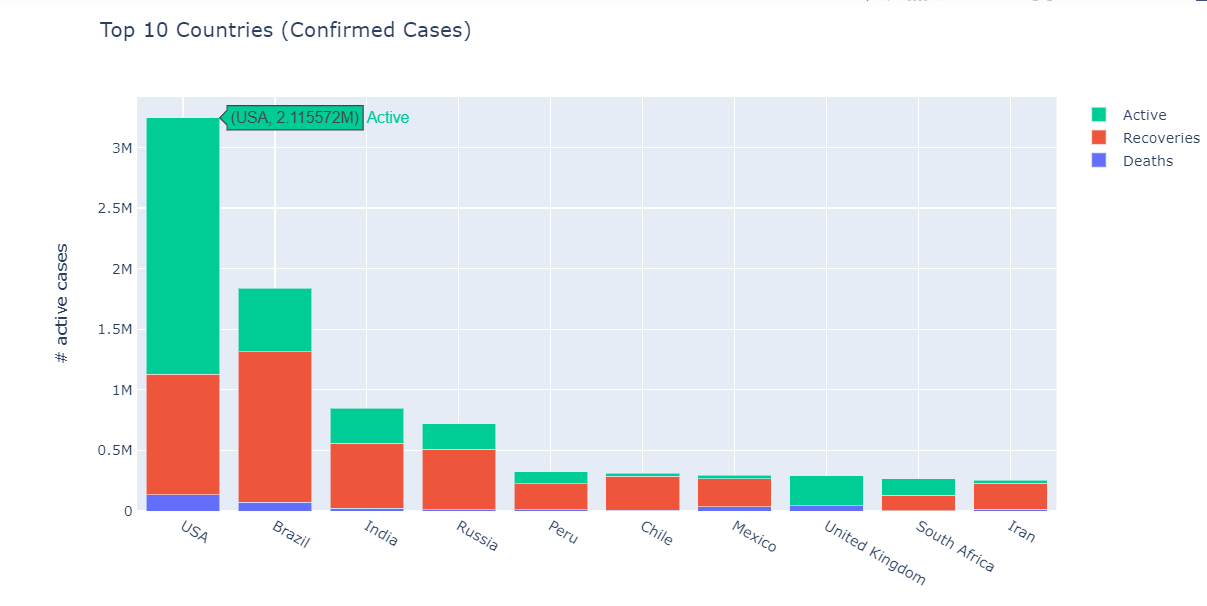

In [47]:
#Nhập code ở đây:
# Draw bar chart
fig = px.bar(top10_df, x = 'Country/Region', y = ['Active', 'Recoveries', 'Deaths'],
            title = 'Top 10 countries (Confirmed cases)')

# Set label
fig.update_layout(
    xaxis_title="Top 10 countries",
    yaxis_title="Number of Cases",
    legend_title="Type of cases",
    font=dict(
        size=15,
        color="black"
    )
)

# Display the chart
fig.show()

# 8. Phân tích nâng cao
 

## Bài toán 18
    Dựa trên dữ liệu trực quan toàn cầu, đại dịch COVID 2019 trên thế giới đã đạt đến đỉnh điểm chưa?
    Bạn hãy trả lời ở đây:


<b>Trả lời :</b>
<p> Due to the increasing rate graph and the heat map of active cases, it seems that there is no certain sight indicated that the pandemic of Covid-19 has reached its peak </p>
<p>To be more specific: </p>

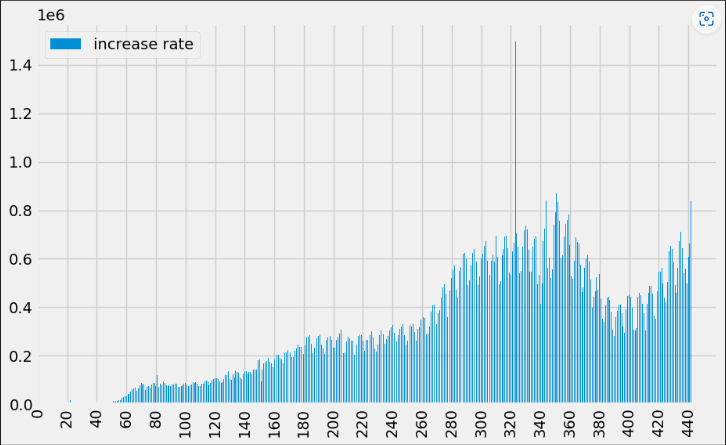
<br>
<p>The bar chart presents the increasing rate of confirmed cases each day all over the world. Overall, the number of confirmed cases raised significantly from 0.1(e^6) to 0.7(e^6) cases in the first 280 days and those figure did not show any sight of declining. In other words, the figures maintained around 0.7(e^6) confirmed cases everyday.</p>

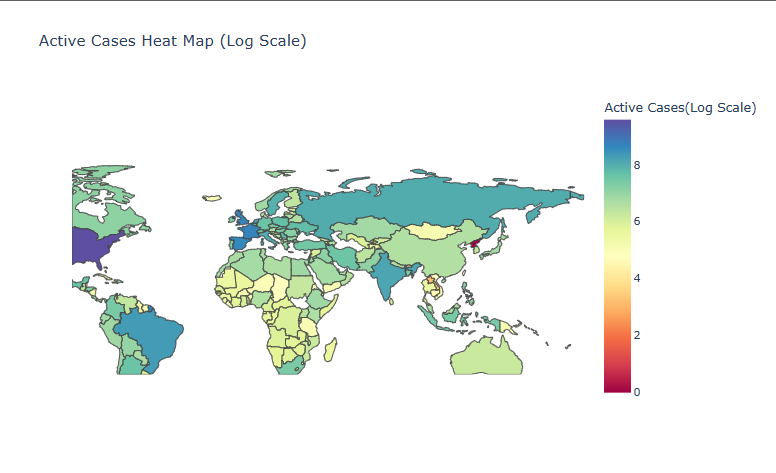
<br>
<p>Moreover, the heatmap of active cases in the world map also demonstrated that the number of active victims mostly stands between 5 to 8 in log scale. Particularly, except some countries with low density of citizens, the rest countries shows negative indicator in terms of decreasing of active cases</p>
<br>
<p>In conclusion, there is no evidence shows that the pandemic of Covid-19 has shrinked</p>

## Bài toán 19
Dựa trên trực quan hóa dữ liệu của châu lục:

    19.1 Châu lục nào có tỷ lệ tử vong cao nhất theo các ca mắc của châu lục?

    19.2 Châu lục nào có tỷ lệ lây lan COVID 2019 cao nhất theo số ca mắc của châu lục?
    
    19.3 Châu lục nào có tỷ lệ phục hồi cao nhất trong tập dữ liệu của các châu lục?

(Lưu ý: Tỷ lệ lan truyền COVID 2019 = Số lượng các ca mới được xác nhận trong 10 ngày qua / số ca mắc trước đó).
Bạn hãy trả lời ở đây:

### 19.1

In [48]:
continents_df.sort_values(by = 'Mortality Rate', ascending = False).head(1)

Confirmed     Deaths  Recoveries     Active  Mortality Rate
Continent                                                                  
South America  3210416219  108561895  2793083156  308771168           3.382

<p>According to the result above, South America is the continent that has the highest mortality rate at around 3.382%</p>

### 19.2

In [49]:
# Define cols variable as the key of confirmed_df
cols = confirmed_df.keys()

# Create ques19_confirmed_df contains only continent and date columns
ques19_confirmed_df = confirmed_df.loc[:, cols[5] : cols[-1]]
ques19_confirmed_df = pd.concat([confirmed_df.loc[:, ['Continent']], ques19_confirmed_df], axis = 1)

# Create ques19_deaths_df contains only continent and date columns
ques19_deaths_df = deaths_df.loc[:, cols[5] : cols[-1]]
ques19_deaths_df = pd.concat([deaths_df.loc[:, ['Continent']], ques19_deaths_df], axis = 1)

# Create ques19_recoveries_df contains only continent and date columns
ques19_recoveries_df = recoveries_df.loc[:, cols[5] : cols[-1]]
ques19_recoveries_df = pd.concat([recoveries_df.loc[:, ['Continent']], ques19_recoveries_df], axis = 1)

# Create a ques19_active_df with the cases each day and groupby continent
ques19_active_df = ques19_confirmed_df.groupby(['Continent']).sum() - ques19_deaths_df.groupby(['Continent']).sum() - ques19_recoveries_df.groupby(['Continent']).sum()

# Create a new_confirmed_last_10_days_df contains cases in the the last 10 days groupby continent
new_confirmed_last_10_days_df = ques19_confirmed_df.groupby(['Continent']).sum().iloc[:, -10 :]

# Create a new df contains data about active cases except last 10 days
ques19_active_df_except_last_10_days = ques19_active_df.iloc[:, : -10]

# Get sum of confirmed cases in each continent in the last 10 days
sum_cases_each_continent_last_10_days = new_confirmed_last_10_days_df.sum(axis = 1)

# Get sum of active cases in each continent except the last 10 days
sum_active_cases_each_continent = ques19_active_df_except_last_10_days.sum(axis = 1)

# Calculate the spread rate in each continent
spread_rate_each_continent = round(sum_cases_each_continent_last_10_days / sum_active_cases_each_continent *100, 3).sort_values(ascending = False)

# Display the continent with the highest spread rate
spread_rate_each_continent.head(1)

Continent
Asia    76.122
dtype: float64

<p>According to the result above, Asia is the continent that has the highest spread rate at around 76.122%</p>

### 19.3

In [50]:
continents_df['Recoveries Rate'] = round(continents_df['Recoveries'] / continents_df['Confirmed'] * 100, 3)
continents_df['Recoveries Rate'].sort_values(ascending = False).head(1)

Continent
Asia    89.226
Name: Recoveries Rate, dtype: float64

<p>According to the result above, Asia is the continent that has the highest recoveries rate at around 89.226%</p>

## Bài toán 20
Dựa trên trực quan hóa dữ liệu theo quốc gia:

    20.1 Quốc gia nào có tỷ lệ tử vong cao nhất theo tập dữ liệu của các quốc gia?

    20.2 Quốc gia nào có tỷ lệ lây lan COVID 2019 cao nhất theo với tập dữ liệu của các quốc gia?
     
    20.3 Quốc gia nào có tỷ lệ hồi phục cao nhất theo tập dữ liệu của các quốc gia?
Bạn hãy trả lời ở đây:
<p><b>Trả lời:</b></p>

### 20.1

In [51]:
country_df.sort_values(by = 'Mortality Rate', ascending = False).head(1)

Country/Region Continent        Lat       Long  Confirmed  Deaths  \
198          Yemen      Asia  15.552727  48.516388     643676  175432   

     Recoveries  Active  Mortality Rate  
198      365731  102513          27.255

<p>According to the result above, Yemen is the Country/Region that has the highest mortality rate at around 27.255%</p>

### 20.2

In [52]:
# Define cols variable as the key of confirmed_df
cols = confirmed_df.keys()

# Create ques20_confirmed_df contains only Country/Region and date columns
ques20_confirmed_df = confirmed_df.loc[:, cols[5] : cols[-1]]
ques20_confirmed_df = pd.concat([confirmed_df.loc[:, ['Country/Region']], ques20_confirmed_df], axis = 1)

# Create ques20_deaths_df contains only Country/Region and date columns
ques20_deaths_df = deaths_df.loc[:, cols[5] : cols[-1]]
ques20_deaths_df = pd.concat([deaths_df.loc[:, ['Country/Region']], ques20_deaths_df], axis = 1)

# Create ques20_recoveries_df contains only Country/Region and date columns
ques20_recoveries_df = recoveries_df.loc[:, cols[5] : cols[-1]]
ques20_recoveries_df = pd.concat([recoveries_df.loc[:, ['Country/Region']], ques20_recoveries_df], axis = 1)

# Create a ques19_active_df with the cases each day and groupby Country/Region
ques20_active_df = ques20_confirmed_df.groupby(['Country/Region']).sum() - ques20_deaths_df.groupby(['Country/Region']).sum() - ques20_recoveries_df.groupby(['Country/Region']).sum()

# Create a new_confirmed_last_10_days_df contains cases in the the last 10 days groupby Country/Region
new_confirmed_last_10_days_df = ques20_confirmed_df.groupby(['Country/Region']).sum().iloc[:, -10 :]

# Create a new df contains data about active cases except last 10 days
ques20_active_df_except_last_10_days = ques20_active_df.iloc[:, : -10]

# Get sum of confirmed cases in each Country/Region in the last 10 days
sum_cases_each_Country_Region_last_10_days = new_confirmed_last_10_days_df.sum(axis = 1)

# Get sum of active cases in each Country/Region except the last 10 days
sum_active_cases_each_Country_Region = ques20_active_df_except_last_10_days.sum(axis = 1)

# Calculate the spread rate in each Country/Region
spread_rate_each_Country_Region = round(sum_cases_each_Country_Region_last_10_days / sum_active_cases_each_Country_Region *100, 3).sort_values(ascending = False)

# Display the Country/Region with the highest spread rate
spread_rate_each_Country_Region.head(1)

Country/Region
Peru    191.98
dtype: float64

<p>According to the result above, Peru is the Country/Region that has the highest spread rate at around 191.98%</p>

### 20.3

In [53]:
country_df
country_df['Recoveries Rate'] = round(country_df['Recoveries'] / country_df['Confirmed'] * 100, 3)
country_df.sort_values(by = 'Recoveries Rate', ascending = False).head(1)

Country/Region Continent        Lat       Long  Confirmed  Deaths  \
192     Uzbekistan      Asia  41.377491  64.585262   17502869  136547   

     Recoveries  Active  Mortality Rate  Recoveries Rate  
192    16519002  847320            0.78           94.379

<p>According to the result above, Uzbekistan is the Country/Region that has the highest recoveries rate at around 94.379%</p>

## Bài toán 21
**USA dataset**

In [54]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

Dựa trên USA dataset:

    21.1 Tiểu bang nào có tỷ lệ tử vong cao nhất theo tập dữ liệu của các tiểu bang?

    21.2 Tiểu bang nào có tỷ lệ lây lan COVID 2019 cao nhất theo tập dữ liệu của các tiểu bang?
    
    21.3 Tiểu bang nào có tỷ lệ hồi phục cao nhất theo tập dữ liệu của các tiểu bang?

In [55]:
us_medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             48 non-null     float64
 8   Active                48 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  Total_Test_Results    10 non-null     float64
 12  People_Hospitalized   36 non-null     float64
 13  Case_Fatality_Ratio   0 non-null      float64
 14  UID                   58 non-null     float64
 15  ISO3                  58 

### 21.1


In [56]:
us_medical_data[['Province_State', 'Mortality_Rate']].sort_values(by = 'Mortality_Rate', ascending = False).head(1)

Province_State  Mortality_Rate
7    Connecticut        9.234503

<p>According to the result above, Connecticut is the province state that has the highest mortality rate at around 9.234%</p>

### 21.2

In [57]:
us_medical_data[['Province_State', 'Incident_Rate']].sort_values(by = 'Incident_Rate', ascending = False).head(1)

Province_State  Incident_Rate
36       New York    2044.093624

<p>According to the result above, Connecticut is the province state that has the highest incidence rate at around 2044.1%</p>

### 21.3

In [58]:
us_medical_data["recoveries_rate"] = np.round(100 * us_medical_data["Recovered"] / us_medical_data["Confirmed"], 2)
us_medical_data.sort_values(by=['recoveries_rate'], inplace=True, ascending=False)
us_medical_data[['Province_State', 'recoveries_rate']].head(1)


Province_State  recoveries_rate
27      Minnesota            87.91

<p>According to the result above, Minnesota is the province state that has the highest recoveries rate at around 87.91%</p>

## Bài toán 22
Xây dựng mô hình hồi quy (hoặc nhiều hơn 1 mô hình) để dự đoán số ca mắc Covid được xác nhận mới ở 10 bang hàng đầu có số ca mắc được xác nhận cao nhất ở Hoa Kỳ.

In [59]:
us_medical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 27 to 54
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             48 non-null     float64
 8   Active                48 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  Total_Test_Results    10 non-null     float64
 12  People_Hospitalized   36 non-null     float64
 13  Case_Fatality_Ratio   0 non-null      float64
 14  UID                   58 non-null     float64
 15  ISO3                  58

### Observation
<p>There are several columns containing NaN values</p>

In [60]:
#Check number of NaN value in each cols
us_medical_data.isna().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               10
Active                  10
FIPS                     0
Incident_Rate            2
Total_Test_Results      48
People_Hospitalized     22
Case_Fatality_Ratio     58
UID                      0
ISO3                     0
Testing_Rate             4
Hospitalization_Rate    22
Date                     0
People_Tested            2
Mortality_Rate           1
recoveries_rate         10
dtype: int64

In [61]:
us_medical_data.head()

Province_State Country_Region          Last_Update      Lat    Long_  \
27      Minnesota             US  2020-07-07 04:34:13  45.6945 -93.9002   
38   North Dakota             US  2020-07-07 04:34:13  47.5289 -99.7840   
47   South Dakota             US  2020-07-07 04:34:13  44.2998 -99.4388   
25  Massachusetts             US  2020-07-07 04:34:13  42.2302 -71.5301   
51        Vermont             US  2020-07-07 04:34:13  44.0459 -72.7107   

    Confirmed  Deaths  Recovered  Active  FIPS  ...  People_Hospitalized  \
27      38569    1511    33907.0  3151.0    27  ...               4219.0   
38       3899      80     3350.0   419.0    38  ...                245.0   
47       7105      97     6063.0   945.0    46  ...                692.0   
25     110137    8198    93157.0  8782.0    25  ...              11469.0   
51       1251      56     1022.0   173.0    50  ...                  NaN   

    Case_Fatality_Ratio         UID  ISO3  Testing_Rate Hospitalization_Rate  \
27                  NaN  84000027.0   USA  12052.080703            10.938837   
38                  NaN  84000038.0   USA  14904.561571             6.365290   
47                  NaN  84000046.0   USA      0.000001             9.739620   
25                  NaN  84000025.0   USA      0.000002            10.413394   
51                  NaN  84000050.0   USA  11274.717984                  NaN   

          Date  People_Tested Mortality_Rate  recoveries_rate  
27  2020-07-06       679693.0       3.917654            87.91  
38  2020-07-06       113582.0       2.078462            85.92  
47  2020-07-06        84303.0       1.365236            85.33  
25  2020-07-06       899417.0       7.443457            84.58  
51  2020-07-06        70353.0       4.476419            81.69  

[5 rows x 22 columns]

In [62]:
us_medical_data.describe()

Lat       Long_      Confirmed        Deaths      Recovered  \
count  56.000000   56.000000      58.000000     58.000000      48.000000   
mean   36.840089  -85.206614   50947.706897   2243.310345   19253.083333   
std    10.887035   49.754449   74656.863084   4811.205558   25019.235785   
min   -14.271000 -170.132000       0.000000      0.000000      19.000000   
25%    34.594600 -101.165775    6211.750000    100.000000    2302.750000   
50%    39.061850  -87.944200   24561.500000    623.000000    7494.000000   
75%    42.361650  -76.970625   64065.500000   2439.500000   26613.750000   
max    61.370700  145.673900  397649.000000  32057.000000  103782.000000   

              Active          FIPS  Incident_Rate  Total_Test_Results  \
count      48.000000     58.000000      56.000000        1.000000e+01   
mean    23159.583333   3288.086207     732.079411        1.016136e+06   
std     48081.047571  17408.350591     480.645481        1.220210e+06   
min        10.000000      1.000000       0.000000        9.895000e+04   
25%       920.750000     18.250000     399.892328        2.994880e+05   
50%      8188.500000     32.500000     716.270971        7.514480e+05   
75%     20096.750000     47.750000     972.553042        1.121427e+06   
max    294552.000000  99999.000000    2044.093624        4.288131e+06   

       People_Hospitalized  Case_Fatality_Ratio           UID  Testing_Rate  \
count            36.000000                  0.0  5.800000e+01  5.400000e+01   
mean           6931.638889                  NaN  7.676194e+07  9.281920e+03   
std           15060.227117                  NaN  2.378302e+07  5.783722e+03   
min             112.000000                  NaN  1.600000e+01  8.392477e-07   
25%            1207.500000                  NaN  8.400001e+07  6.218817e+03   
50%            2889.500000                  NaN  8.400003e+07  9.129962e+03   
75%            7526.000000                  NaN  8.400004e+07  1.222846e+04   
max           89995.000000                  NaN  8.410000e+07  2.368919e+04   

       Hospitalization_Rate  People_Tested  Mortality_Rate  recoveries_rate  
count             36.000000   5.600000e+01       57.000000        48.000000  
mean              10.836720   6.842917e+05        3.504434        53.163542  
std                4.365550   9.663252e+05        2.230738        27.103266  
min                4.582712   6.960000e+02        0.000000         3.240000  
25%                7.035681   1.263225e+05        1.805475        27.770000  
50%               10.490763   3.701025e+05        2.803243        60.450000  
75%               12.767948   8.285572e+05        4.751632        74.795000  
max               22.631768   4.793353e+06        9.234503        87.910000

C:\Users\ASUS STRIX\AppData\Local\Temp\ipykernel_11632\2704855395.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

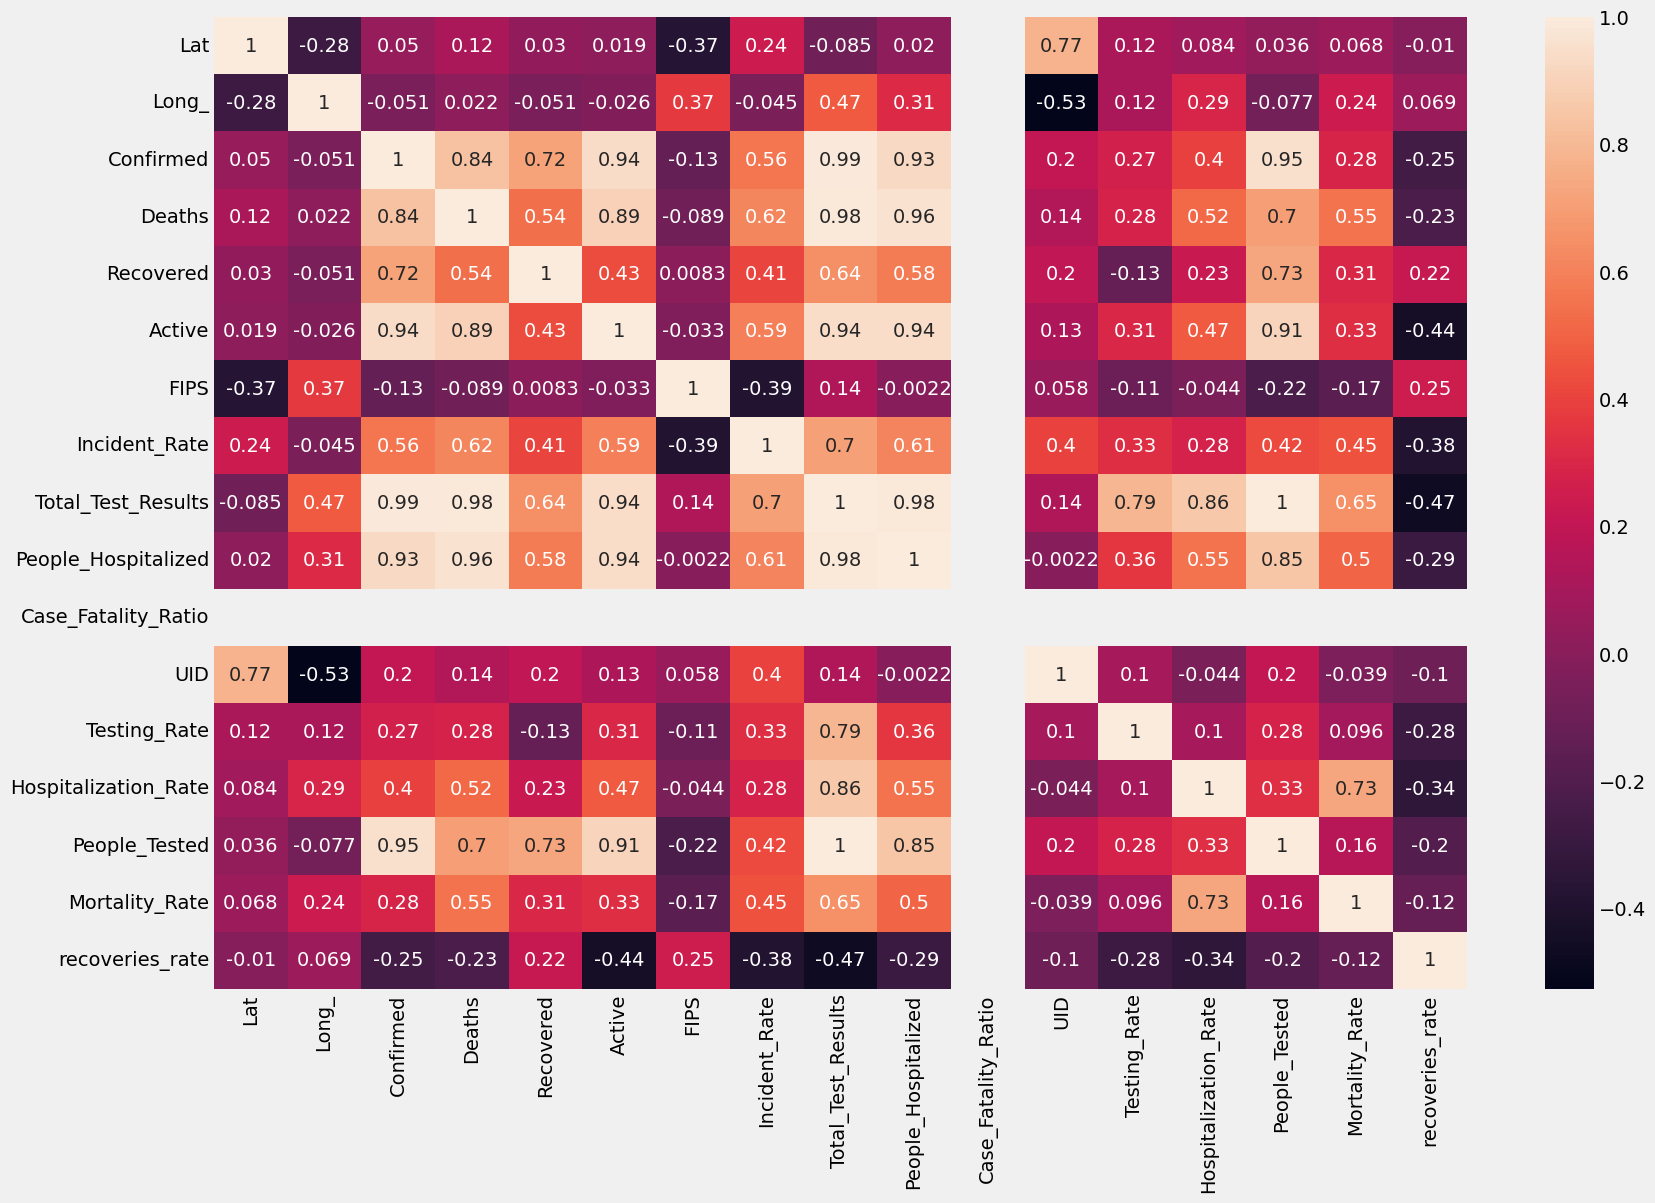

In [63]:
f1, ax1 = plt.subplots(figsize=(18, 12))
corr1 = us_medical_data.corr()
sns.heatmap(corr1, annot=True)

### Observation
Choosing confirmed and People_Test columns since the coefficence of correlation matrix is 0.95

In [64]:
mean_people_test = round(us_medical_data['People_Tested'].mean(), 3)
us_medical_data['People_Tested'] = us_medical_data['People_Tested'].fillna(mean_people_test)

In [65]:
us_medical_data.sort_values(by = 'Confirmed', ascending = False, inplace = True)

In [66]:
train = us_medical_data.head(10)

Coefficient of determination:  0.8091390640825967
Intercept:  52636.29518169681
Slope:  0.059052028842550806
Regression Equation:  y = 0.059052x + 52636.295182


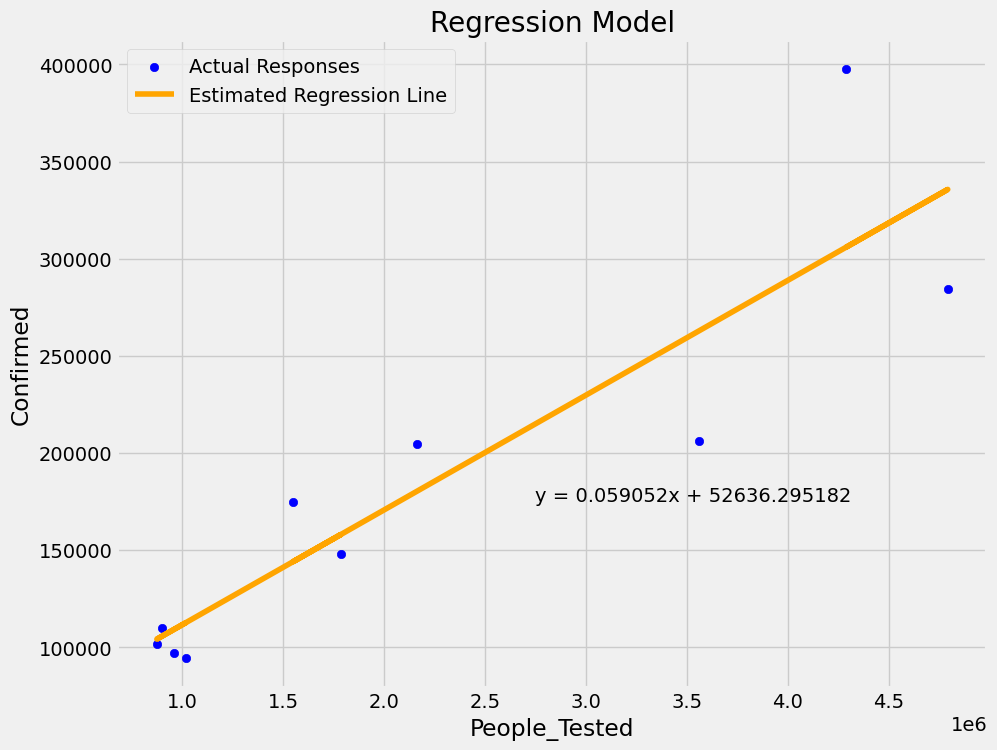

In [67]:
from sklearn.metrics import r2_score

# Create model
model = linear_model.LinearRegression()
train_x = np.asanyarray(train[['People_Tested']])
train_y = np.asanyarray(train[['Confirmed']])

# Train model
model.fit(train_x, train_y)

# Calculate coefficent of determination
yhat = model.predict(train_x)
score = r2_score(train_y, yhat)

# Print out linear regression line function
print ('Coefficient of determination: ', score)
print ('Intercept: ',model.intercept_[0])
print('Slope: ', model.coef_[0][0])
print('Regression Equation: ', 'y = {0:0f}x + {1:0f}'.format(model.coef_[0][0], model.intercept_[0]))

# Set legend label
labels = ['Actual Responses', 'Estimated Regression Line']

# Set figsize of graph
plt.figure(figsize = (10,8))

# Draw scatter plot for output
plt.scatter(train.People_Tested, train.Confirmed,  color='blue')
plt.plot(train_x, model.coef_[0][0]*train_x + model.intercept_[0], 'orange')
plt.annotate('y = {0:0f}x + {1:0f}'.format(model.coef_[0][0], model.intercept_[0]), xy = (2.75 * 1E6, 175000))
plt.xlabel("People_Tested")
plt.ylabel("Confirmed")
plt.title("Regression Model")
plt.legend(labels = labels, loc = 'upper left')